## PROJET 3 : Partie 2 --  Exploration "SelfyEat"

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

df = pd.read_csv('data.csv')

In [55]:
# Versions 
print('Version des librairies utilisées :')
print('NumPy         : ' + np.version.full_version)
print('Pandas        : ' + pd.__version__)
print('Seaborn       : ' + sns.__version__)



import datetime
now  = datetime.datetime.now().isoformat()
print('Lancé le           : ' + now)

Version des librairies utilisées :
NumPy         : 1.21.5
Pandas        : 1.4.2
Seaborn       : 0.11.2
Lancé le           : 2022-09-01T13:00:28.351931


In [2]:
df.describe(include='all')

url product_name  \
count                                               58715        58715   
unique                                              58715        49275   
top     http://world-fr.openfoodfacts.org/produit/0000...   Mayonnaise   
freq                                                    1           42   
mean                                                  NaN          NaN   
std                                                   NaN          NaN   
min                                                   NaN          NaN   
25%                                                   NaN          NaN   
50%                                                   NaN          NaN   
75%                                                   NaN          NaN   
max                                                   NaN          NaN   

           brands                             ingredients_text  \
count       58521                                        39149   
unique      12225                                        36698   
top     Carrefour  Semoule de _blé_ dur de qualité supérieure.   
freq         2246                                          102   
mean          NaN                                          NaN   
std           NaN                                          NaN   
min           NaN                                          NaN   
25%           NaN                                          NaN   
50%           NaN                                          NaN   
75%           NaN                                          NaN   
max           NaN                                          NaN   

       nutrition_grade_fr pnns_groups_1   energy_100g      fat_100g  \
count               58715         58715  58715.000000  58715.000000   
unique                  5            10           NaN           NaN   
top                     d       unknown           NaN           NaN   
freq                16484         20433           NaN           NaN   
mean                  NaN           NaN    270.435777     13.475374   
std                   NaN           NaN    181.310849     16.495351   
min                   NaN           NaN      0.000000      0.000000   
25%                   NaN           NaN    108.030593      1.550000   
50%                   NaN           NaN    253.346080      7.300000   
75%                   NaN           NaN    397.944551     21.070000   
max                   NaN           NaN    898.900574    100.000000   

        saturated-fat_100g  carbohydrates_100g   sugars_100g    fiber_100g  \
count         58715.000000        58715.000000  58715.000000  58715.000000   
unique                 NaN                 NaN           NaN           NaN   
top                    NaN                 NaN           NaN           NaN   
freq                   NaN                 NaN           NaN           NaN   
mean              5.462013           28.421546     13.591967      2.097402   
std               8.321186           27.158650     19.121329      3.504290   
min               0.000000            0.000000      0.000000      0.000000   
25%               0.300000            4.700000      1.000000      0.000000   
50%               2.000000           15.760000      4.200000      1.000000   
75%               7.500000           54.000000     18.400000      2.700000   
max             100.000000          100.000000    100.000000     87.500000   

        proteins_100g     salt_100g  nutrition-score-fr_100g  
count    58715.000000  58715.000000             58715.000000  
unique            NaN           NaN                      NaN  
top               NaN           NaN                      NaN  
freq              NaN           NaN                      NaN  
mean         7.844022      1.064835                 8.802487  
std          7.682181      3.529392                 9.041600  
min          0.000000      0.000000               -14.000000  
25%          2.100000      0.090000                 1.000000  
50%          6.

In [3]:
df.shape

(58715, 15)

In [4]:
df.head()

url  \
0  http://world-fr.openfoodfacts.org/produit/0000...   
1  http://world-fr.openfoodfacts.org/produit/0000...   
2  http://world-fr.openfoodfacts.org/produit/0000...   
3  http://world-fr.openfoodfacts.org/produit/0000...   
4  http://world-fr.openfoodfacts.org/produit/0000...   

                 product_name        brands  \
0              Lion Peanut x2      Sunridge   
1              Mini Confettis  Alice Délice   
2  Praliné Amande Et Noisette  Alice Délice   
3       Pepsi, Nouveau goût !         Pepsi   
4   Tarte Poireaux Et Lardons      Bo Frost   

                                    ingredients_text nutrition_grade_fr  \
0  Milk chocolate coating (evaporated cane juice,...                  e   
1                                                NaN                  d   
2                                                NaN                  d   
3  Eau gazéifiée, sucre, colorant caramel E150d, ...                  e   
4                                                NaN                  d   

  pnns_groups_1  energy_100g  fat_100g  saturated-fat_100g  \
0       unknown   450.047801     20.00                12.5   
1       unknown   418.977055      3.64                 0.8   
2       unknown   575.047801     37.80                 2.9   
3     Beverages    42.304015      0.00                 0.0   
4       unknown   257.887189     19.14                11.0   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0               70.00         57.5         2.5            2.5    0.09652   
1               91.32         87.7         0.9            0.6    0.01000   
2               55.20         50.3         3.9            9.5    0.00300   
3               10.40         10.4         0.0            0.0    0.02540   
4               13.30          1.0         1.4            7.5    0.80000   

   nutrition-score-fr_100g  
0                     22.0  
1                     14.0  
2                     14.0  
3                     13.0  
4                     15.0

### ANALYSE UNIVARIEES : catégories, marques, des notes , des apports énergetiques,score nutritionnel et de nos "macro-nutriments . 

#### 1) Quelle est la répartition des produits par catégorie ? 

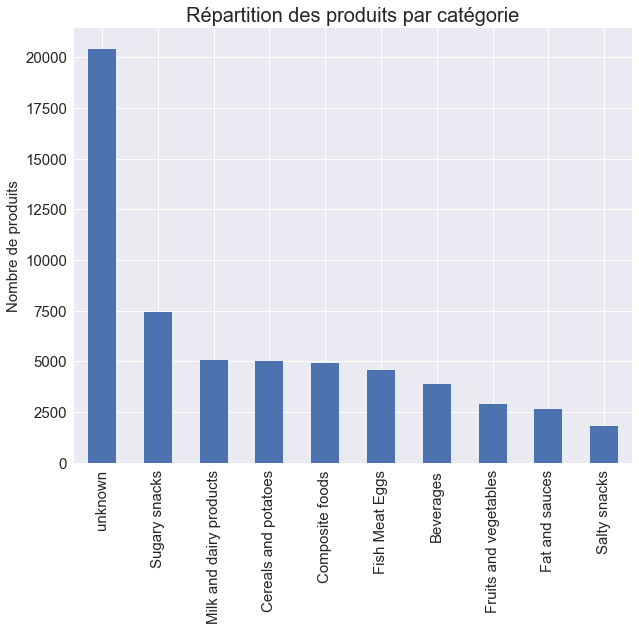

In [5]:
fig,ax=plt.subplots(figsize=(10,8))
df['pnns_groups_1'].value_counts().plot(kind='bar')
ax.set_title('Répartition des produits par catégorie',size =20)
ax.tick_params(labelsize=15)
ax.set_ylabel("Nombre de produits",size=15)
plt.show()

- sugary snacks | Milk and Dairy products | Cereals and Potatoes | Composite foods | Fish Meat Eggs Beverages | Fruits and vegetables | fat and sauces | Salty snacks


- snacks sucrés | Lait et produits laitiers | Céréales et pommes de terre | Aliments composés | Poisson Viande Oeufs Boissons | Fruits et légumes | graisses et sauces | Snacks salés

In [6]:
cat_unknown = len(df[df["pnns_groups_1"] == 'unknown'])
cat_null = len(df[df["pnns_groups_1"].isnull()])
print(f"{(cat_unknown+cat_null)/df.shape[0]*100:.0f}% des produits sont sans catégories.")

35% des produits sont sans catégories.


Remarque : 
 - 35% des produits sans catégories  -> donc : 65% en présente une .
 - La plupart des catégories comptent entre 2500 et 5000 produits & sont    représenter.
 - Avec un max pour les "Sugary snacks" et un min pour les "Salty snacks"

#### 2) Quelles sont les marques les plus représentées ? 

Text(0, 0.5, 'Nombre de produits')

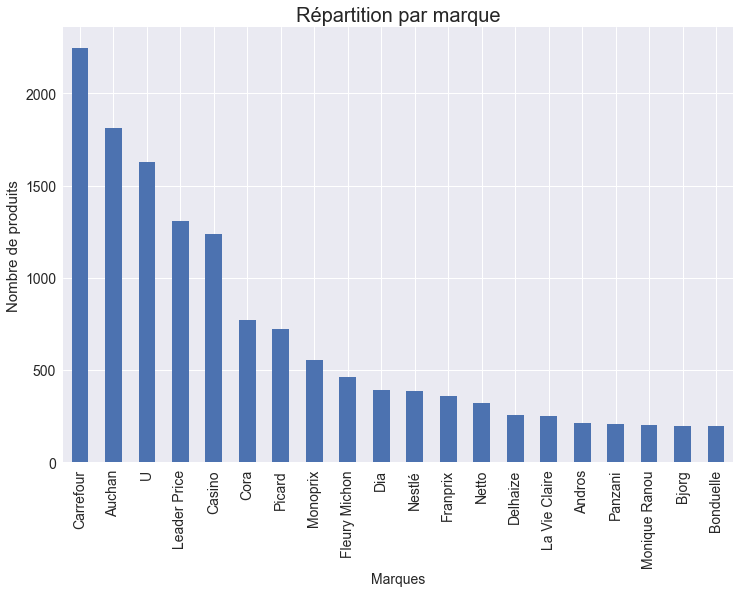

In [7]:
from matplotlib.pyplot import tick_params
from pandas import value_counts


fig, ax = plt.subplots(figsize=(12, 8)) 
df['brands'].value_counts().head(20).plot(kind='bar')
ax.set_title("Répartition par marque",size=20)
ax.tick_params(labelsize=14)
ax.set_xlabel("Marques",size=14)
ax.set_ylabel("Nombre de produits", size =15)

Remarque : 

 - Les enseignes de grande distribution sont les plus représentées: 

   - exemple : Carrefour,Auchan, U et Leader Price. 
   <br></br> 

 - Cependant, nous pouvons quand même retrouver des marques de produits tel que : "Nestlé ou Fleury Michon"
   

#### 3 ) Répartition par note de nos différents produit allant de A à E.

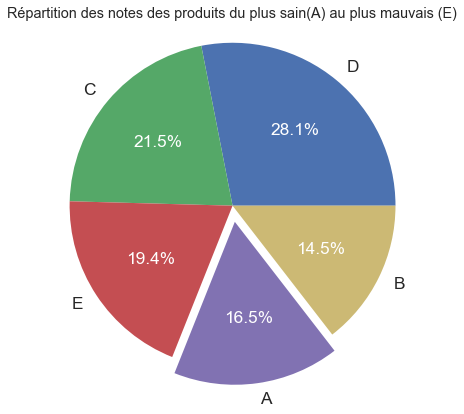

In [8]:
from matplotlib import patches


grades = df['nutrition_grade_fr'].value_counts()

fig,ax = plt.subplots(figsize=(7,7))

explode = (0, 0, 0, 0.1,0)

patches,texts,autotexts = ax.pie(grades.values,explode=explode,labels = grades.index,autopct='%1.1f%%')
for t in texts:
    t.set_text(t.get_text().upper())
    t.set_size("xx-large")
for t in autotexts:
    t.set_size("xx-large")
    t.set_color('w')
ax.set_title("Répartition des notes des produits du plus sain(A) au plus mauvais (E)",size ='x-large')
ax.axis('equal')

plt.show()


Remarque : 

 - Globalement, la répartition est homogène entre les différentes dans son ensemble.

 - Cependant, si nous regardons dans les 2 notes les plus élevés (A et B) ainsi que les plus mauvais ( D et E), nous pouvons voir une petite différence en faveur de ses dernières  : <span style="color:green"> A+B = 35% </span> <  <span style="color:red">D+E = 47,5%. </span>

#### 4 ) Distribution des apports énergetique 

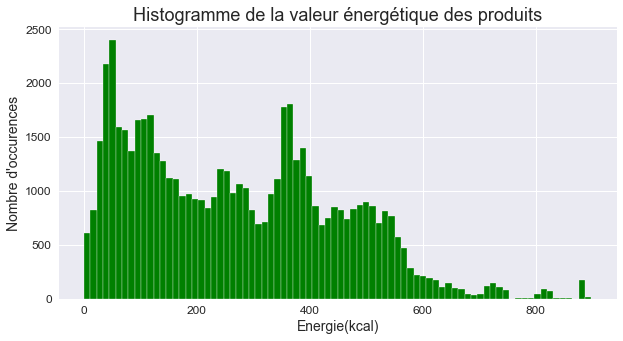

In [9]:
#Histogramme 

fig, ax = plt.subplots(figsize=(10,5))

ax.hist(df['energy_100g'],bins=80,histtype ='bar',color='green',edgecolor='white')
ax.set_title("Histogramme de la valeur énergétique des produits", size =18)
ax.set_xlabel("Energie(kcal)",size=14)
ax.set_ylabel("Nombre d'occurences",size=14)
ax.tick_params(labelsize=12)

plt.show()

Remarque : 

 - distribution  inégale concentrée surtout aux alentours de :

   * de 60kcal
   * de 100-120 kcal 
   * de 250kcal 
   * de 320-380 kcal 
   <br> <br/>

- Excentrée vers la gauche avec grandes majorités des produits < 550 kcal

=> Au final, la plupart des produits ont une valeurs énergétique comprise entre <strong>60kcal</strong> et <strong>380kcal </strong>. 

In [10]:
# A noter : Les produits les plus caloriques sont essentiellements les huiles et beurres principalement composé de lipides (nutriment les plus caloriques )
df.nlargest(10,'energy_100g')

url  \
46205  http://world-fr.openfoodfacts.org/produit/3760...   
48657  http://world-fr.openfoodfacts.org/produit/5013...   
57378  http://world-fr.openfoodfacts.org/produit/8711...   
4408   http://world-fr.openfoodfacts.org/produit/2700...   
21965  http://world-fr.openfoodfacts.org/produit/3259...   
31259  http://world-fr.openfoodfacts.org/produit/3368...   
47612  http://world-fr.openfoodfacts.org/produit/4032...   
48761  http://world-fr.openfoodfacts.org/produit/5019...   
46265  http://world-fr.openfoodfacts.org/produit/3760...   
47986  http://world-fr.openfoodfacts.org/produit/4260...   

                                         product_name         brands  \
46205                                   Huile D'olive       Bronzini   
48657                                Pure coconut oil            Ktc   
57378                          Kokosolie Extra Virgin       Ekoplaza   
4408                                    El cultivador  El cultivador   
21965                               Huile d'olive bio         Soleou   
31259  Huile D'olive à L'ail Et Au Romarin U Saveurs,      U saveurs   
47612                                            Ghee      Cosmoveda   
48761                   Butter ghee (beurre clarifié)         Khanum   
46265             Huile D'olive Saveur Ail Et Poivron         Savora   
47986                          Foodspring Coconut Oil     Foodspring   

                                        ingredients_text nutrition_grade_fr  \
46205                                                NaN                  e   
48657                                                NaN                  e   
57378                       Biologische kokosolie (100%)                  d   
4408                                                 NaN                  e   
21965                                                NaN                  e   
31259                                                NaN                  e   
47612                                                NaN                  e   
48761  Matières grasses butyriques 99,8 % minimum Hum...                  e   
46265                                                NaN                  e   
47986                                                NaN                  e   

        pnns_groups_1  energy_100g  fat_100g  saturated-fat_100g  \
46205         unknown   898.900574     99.80                17.0   
48657         unknown   898.900574     99.76                95.5   
57378  Fat and sauces   898.661568    100.00                91.0   
4408   Fat and sauces   897.944551    100.00                14.0   
21965         unknown   897.944551    100.00                13.8   
31259         unknown   897.944551    100.00                13.8   
47612         unknown   897.944551     99.76                65.0   
48761  Fat and sauces   897.944551     99.80                63.3   
46265         unknown   896.032505    100.00                14.0   
47986         unknown   896.032505     99.76                93.0   

       carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
46205                 0.1          0.0         0.0            0.0      0.000   
48657                 0.1          0.0         0.0            0.2      0.500   
57378                 0.0          0.0         0.0            0.0      0.000   
4408                  0.0          0.0         0.0            0.0      0.000   
21965                 0.0          0.0         0.0            0.0      0.001   
31259                 0.0          0.0         0.0            0.0      0.000   
47612                 0.1          0.0         0.0            0.0      0.000   
48761                 0.1          0.1         0.5            0.1      0.100   
46265                 0.0          0.1         0.0            0.1      0.100   
47986                 0.1          0.1         0.0            0.1      0.000   

       nutrition-score-fr_100g  
46205                     20.0  
48657                     22.0  


In [11]:
# A l'inverse les produits les moins caloriques ce sont essentiellement les boissons sans sucre et principalement constitué d'eau . 
#Note : on exclue les valeurs = 0 qui peuvent être des valeurs non-renseigné. 

df[df['energy_100g']>0].nsmallest(10,'energy_100g')

url  \
34741  http://world-fr.openfoodfacts.org/produit/3502...   
51850  http://world-fr.openfoodfacts.org/produit/5449...   
48156  http://world-fr.openfoodfacts.org/produit/5000...   
7705   http://world-fr.openfoodfacts.org/produit/3068...   
7708   http://world-fr.openfoodfacts.org/produit/3068...   
7712   http://world-fr.openfoodfacts.org/produit/3068...   
27308  http://world-fr.openfoodfacts.org/produit/3278...   
34742  http://world-fr.openfoodfacts.org/produit/3502...   
41557  http://world-fr.openfoodfacts.org/produit/3596...   
48147  http://world-fr.openfoodfacts.org/produit/5000...   

                product_name                brands  \
34741                  Free                    7UP   
51850         Coca-Cola Zero             Coca-Cola   
48156          CocaCola zero             Coca-Cola   
7705     Sans sucres Agrumes  La Salvetat,Salvetat   
7708           Badoit Citron         Badoit,Danone   
7712        Badoit Framboise                Badoit   
27308         Coca-cola zéro             Coca-Cola   
34742  Pepsi light décaféiné                 Pepsi   
41557          Limonade Zero                Auchan   
48147        Coca-Cola Light             Coca-Cola   

                                        ingredients_text nutrition_grade_fr  \
34741  Eau gazéifiée, acidifiants (acide citrique, ac...                  b   
51850  eau gazéifiée , colorant: caramel (E150d) , ac...                  b   
48156                                                NaN                  b   
7705   Eau minérale naturelle gazéifiée à la Salvetat...                  a   
7708   Eau minérale naturelle gazéifiée Badoit 99.9%,...                  a   
7712   Eau minérale naturelle gazéifiée Badoit 99.9%,...                  a   
27308  Eau gazéifiée, colorant : caramel (E150d), aci...                  b   
34742  Eau gazéifiée, colorant (caramel E150d), acidi...                  b   
41557                                                NaN                  b   
48147  Eau gazéifiée ; colorant : E150d ; acidifiants...                  b   

      pnns_groups_1  energy_100g  fat_100g  saturated-fat_100g  \
34741     Beverages     0.143403       0.0                 0.0   
51850     Beverages     0.215105       0.0                 0.0   
48156     Beverages     0.219885       0.0                 0.0   
7705      Beverages     0.239006       0.0                 0.0   
7708      Beverages     0.239006       0.0                 0.0   
7712      Beverages     0.239006       0.0                 0.0   
27308     Beverages     0.239006       0.0                 0.0   
34742     Beverages     0.239006       0.0                 0.0   
41557       unknown     0.239006       0.0                 0.0   
48147     Beverages     0.239006       0.0                 0.0   

       carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
34741                 0.0          0.0         0.1            0.0     0.0400   
51850                 0.0          0.0         0.1            0.0     0.0200   
48156                 0.0          0.0         0.1            0.0     0.0200   
7705                  0.0          0.0         0.1            0.0     0.0100   
7708                  0.0          0.0         0.1            0.0     0.0450   
7712                  0.0          0.0         0.1            0.0     0.0450   
27308                 0.0          0.0         0.0            0.0     0.0254   
34742                 0.0          0.0         0.1            0.0     0.0100   
41557                 0.0          0.0         0.7            0.0     0.0100   
48147                 0.0          0.0         0.1            0.0     0.0000   

       nutrition-score-fr_100g  
34741                      1.0  
51850                      1.0  
48156                      1.0  
7705                       1.0  
7708                       1.0  
7712                       1.0  
27308                      1.0  
34742                      1.0  
41557                 

#### 5)  Nos Macro-nutriments : lipides ,glucides , protéines et fibres

##### 5-a: Les Lipides 

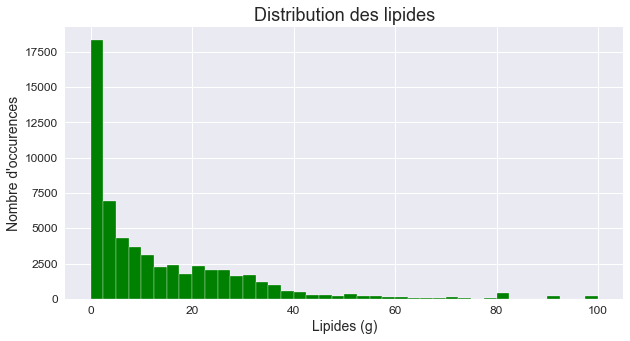

In [12]:
from turtle import color


fig,ax = plt.subplots(figsize=(10,5))

ax.hist(df['fat_100g'].dropna(),bins=40,histtype='bar',color='green',edgecolor='white',range=(0,100))
ax.set_title("Distribution des lipides", size =18)
ax.set_xlabel("Lipides (g)",size=14)
ax.set_ylabel("Nombre d'occurences",size=14)
ax.tick_params(labelsize=12)

plt.show()

Remarque : 
 
 - La quasi-totalité des produits ne présente pas ou peu de lipide.
 
 - La distribution est très excentrée vers la gauche .
 - Or ce sont les graisses saturées que nous surveillons pour une alimentation saine ! 

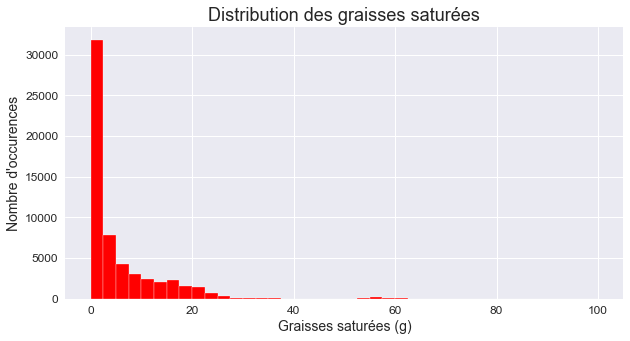

In [13]:
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(df["saturated-fat_100g"],bins=40,histtype='bar',color="red",edgecolor ="white",range=(0,100))
ax.set_title("Distribution des graisses saturées",size=18)
ax.set_xlabel("Graisses saturées (g)",size=14)
ax.set_ylabel("Nombre d'occurences",size=14)
ax.tick_params(labelsize=12)

plt.show()

Remarque : 

 - de même que la représentation précèdente : la distribution des graisses saturées est très excentrée vers la gauche . 

 - de même qu'elle est faiblement représenter.  

In [14]:
#Obersations des produits représentant le plus de graisses saturées : 
#Note : Un filtre sur le nbr de calories à été ajouter pour éviter les éventuelles erreurs 

df[df["energy_100g"] > 500].nlargest(10, 'saturated-fat_100g')

url  \
1590   http://world-fr.openfoodfacts.org/produit/2002...   
3696   http://world-fr.openfoodfacts.org/produit/2600...   
49482  http://world-fr.openfoodfacts.org/produit/5158...   
49602  http://world-fr.openfoodfacts.org/produit/5400...   
48657  http://world-fr.openfoodfacts.org/produit/5013...   
47960  http://world-fr.openfoodfacts.org/produit/4260...   
47661  http://world-fr.openfoodfacts.org/produit/4038...   
27906  http://world-fr.openfoodfacts.org/produit/3291...   
27907  http://world-fr.openfoodfacts.org/produit/3291...   
27930  http://world-fr.openfoodfacts.org/produit/3291...   

                                       product_name         brands  \
1590                              Frites & Fritures      Vita d'Or   
3696                                       Jog'Frit       Jog'Frit   
49482                  Végétaline (offre familiale)     Végétaline   
49602                                 Carrefour Bio  Huile De Coco   
48657                              Pure coconut oil            Ktc   
47960                                 Huile de coco         Danlee   
47661                                   Kokosnussöl        Govinda   
27906                  Huile vierge de noix de coco     Emile Noël   
27907                  Huile vierge de noix de coco     Émile Noël   
27930  Huile de noix de coco biologique goût neutre     Émile noël   

                                        ingredients_text nutrition_grade_fr  \
1590               Huile de coprah totalement hydrogénée                  e   
3696        Huile de noix de coco totalement hydrogénée.                  e   
49482                                                NaN                  d   
49602                                                NaN                  e   
48657                                                NaN                  e   
47960                              Huile de coco vierge.                  e   
47661                                                NaN                  e   
27906  huile vierge de noix de coco (dont acide lauri...                  e   
27907                                                NaN                  d   
27930                                Huile de coco 100 %                  d   

        pnns_groups_1  energy_100g  fat_100g  saturated-fat_100g  \
1590   Fat and sauces   884.321224    100.00               100.0   
3696   Fat and sauces   884.321224    100.00               100.0   
49482  Fat and sauces   884.321224    100.00               100.0   
49602         unknown   885.994264     99.76                96.0   
48657         unknown   898.900574     99.76                95.5   
47960  Fat and sauces   858.030593    100.00                93.8   
47661         unknown   886.950287     99.76                93.1   
27906  Fat and sauces   884.321224    100.00                93.0   
27907  Fat and sauces   884.321224    100.00                93.0   
27930  Fat and sauces   884.321224    100.00                93.0   

       carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
1590                  0.0          0.0         0.5            0.0     0.0000   
3696                  0.0          0.0         0.5            0.0     0.0000   
49482                 0.0          0.0         0.5            0.0     0.0000   
49602                 0.1          0.5         0.0            0.5     0.1000   
48657                 0.1          0.0         0.0            0.2     0.5000   
47960                 0.0          0.0         0.5            0.0     0.0000   
47661                 0.1          0.1         0.8            0.1     0.0100   
27906                 0.0          0.0         0.0            0.0     0.0250   
27907                 0.0          0.0         0.0            0.0     0.0254   
27930                 0.0          0.0         0.5            0.0     0.0000   

       nutrition-score-fr_100g  
1590                      20.0  
3696                      20.0  
49482                 

Remarque : 

- Nous pouvons voir que : les  "huiles de cocos" sont globalement à éviter en vue des critères d'une alimentation saine! 

##### 5-b: Les glucides

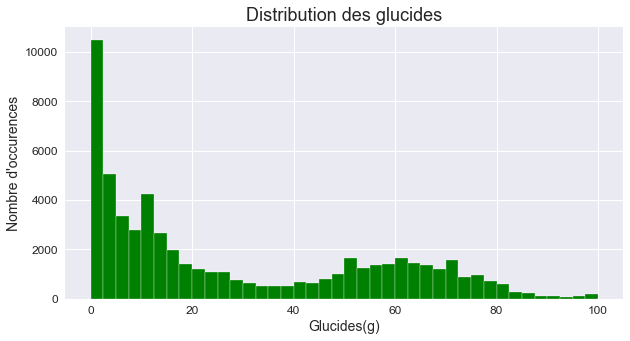

In [15]:
fig , ax = plt.subplots(figsize=(10,5))

ax.hist(df["carbohydrates_100g"].dropna(),bins= 40,histtype='bar',color='green',edgecolor='white',range=(0,100))
ax.set_title("Distribution des glucides",size=18)
ax.set_xlabel("Glucides(g)",size=14)
ax.set_ylabel("Nombre d'occurences",size=14)
ax.tick_params(labelsize=12)

plt.show()

Remarque : 

- La majorité des produits contiennent peu de glucides 
- Nous avons distribution  presque "bi-modale" : 
 <br>
  * autour de 0-20g
  * autour de 40-80g
 </br>

=> Pour une alimentation seine ,il est aussi nécessaire de jeter un coup d'oeil sur la distrubtion du <strong>sucre</strong> dans nos produits :

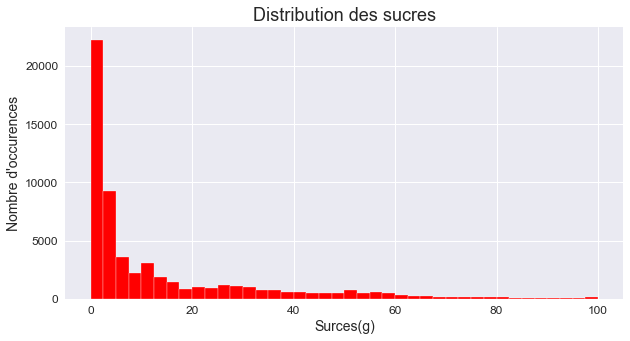

In [16]:
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(df['sugars_100g'],bins=40,histtype='bar',color='red',edgecolor='white',range=(0,100))
ax.set_title("Distribution des sucres",size =18)
ax.set_xlabel("Surces(g)",size =14)
ax.set_ylabel("Nombre d'occurences",size =14)
ax.tick_params(labelsize=12)

plt.show()



Remarque : 
 
 - Nous retrouvons la quasi-même distribution que celle des graisses saturées, la plupart des produits n'en contienne pas ou très peu ! 

In [17]:
#Obersations des produits représentant le plus de sucre : 
#Note : Un filtre sur le nbr de calories à été ajouter pour éviter les produits qui contiennent uniquement de sucres (env = 400Kcal)
 
df[df['energy_100g']>450 ].nlargest(10,'sugars_100g') 

url  \
57228  http://world-fr.openfoodfacts.org/produit/8710...   
16417  http://world-fr.openfoodfacts.org/produit/3250...   
7773   http://world-fr.openfoodfacts.org/produit/3073...   
28614  http://world-fr.openfoodfacts.org/produit/3307...   
48803  http://world-fr.openfoodfacts.org/produit/5022...   
48091  http://world-fr.openfoodfacts.org/produit/4901...   
57006  http://world-fr.openfoodfacts.org/produit/8593...   
50708  http://world-fr.openfoodfacts.org/produit/5410...   
51106  http://world-fr.openfoodfacts.org/produit/5411...   
50427  http://world-fr.openfoodfacts.org/produit/5410...   

                                       product_name                  brands  \
57228                                    De Ruijter              De Ruijter   
16417              ChOc Bonbons de chocolat au lait                   Netto   
7773                       Vermicelles Multicolores             Cacao Barry   
28614  Castellane biscuiterie canistrelli au citron  Castellane Biscuiterie   
48803      Creme Brulee Flavour White Hot Chocolate                Whittard   
48091                           Salted Rice Cracker           Kameda crisps   
57006                                      Lentilky            Orion,Nestlé   
50708                      Biscuit Caramélisé Lotus                   Lotus   
51106                                Spéculoos 335G                  Belbis   
50427                                   Vermicelles                   Kwata   

                                        ingredients_text nutrition_grade_fr  \
57228                                                NaN                  e   
16417  Sucre, beurre de cacao, lait entier en poudre,...                  e   
7773   Sucre, beurre de cacao, pâte de cacao, poudre ...                  e   
28614                                                NaN                  d   
48803                                                NaN                  e   
48091                                                NaN                  e   
57006  Chocolat au lait 53% (sucre, pâte de cacao, _l...                  e   
50708                                                NaN                  e   
51106                                                NaN                  e   
50427                                                NaN                  e   

       pnns_groups_1  energy_100g  fat_100g  saturated-fat_100g  \
57228        unknown   460.086042     17.80                 9.0   
16417  Sugary snacks   473.948375     16.00                 8.8   
7773         unknown   471.080306     18.00                11.0   
28614        unknown   454.110899     16.56                 1.4   
48803        unknown   460.086042     17.80                 9.1   
48091        unknown   467.017208     17.76                 1.4   
57006  Sugary snacks   478.967495     17.70                11.2   
50708        unknown   483.986616     20.02                19.0   
51106        unknown   482.074570     20.02                18.4   
50427        unknown   450.047801     15.86                 9.1   

       carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
57228               69.92         77.0         1.0            6.0    1.00000   
16417               78.00         76.0         1.3            3.2    0.03048   
7773                75.00         75.0         0.7            1.8    0.03000   
28614               68.60         75.0         2.0            7.0    0.60000   
48803               69.92         74.4         0.0            4.2    0.65000   
48091               71.42         74.0         0.0            4.3    1.60000   
57006               74.50         72.9         1.6            4.1    0.10000   
50708               68.28         72.7         1.3            4.9    0.92000   
51106               68.28         72.4         0.0            6.7    0.60000   
50427               69.54         72.0         0.0            5.7    0.12000   

       nutrition-score-fr_100g  


Remarque :

Les produits les plus sucrés(hors sucres purs) sont essentiellement des produits transformés notamment sucrés tels que : biscuits,bonbons,... . 

##### 5-c: Les protéines


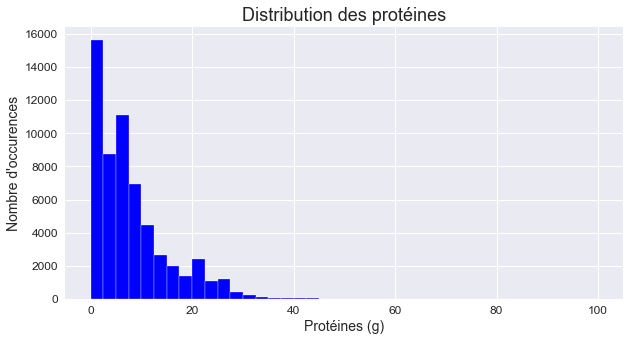

In [18]:
fig,ax = plt.subplots(figsize=(10, 5))

ax.hist(df['proteins_100g'].dropna(),bins=40,histtype='bar',color='blue',edgecolor='white',range=(0,100))
ax.set_title("Distribution des protéines",size=18)
ax.set_xlabel("Protéines (g)",size=14)
ax.set_ylabel("Nombre d'occurences",size=14)
ax.tick_params(labelsize =12)

plt.show()

Remarque :

 - Distribution excentrée vers la gauche 
 - La plupart des produits contiennent entre 0 et 20g de protéines. 

##### 5-d: Les fibres

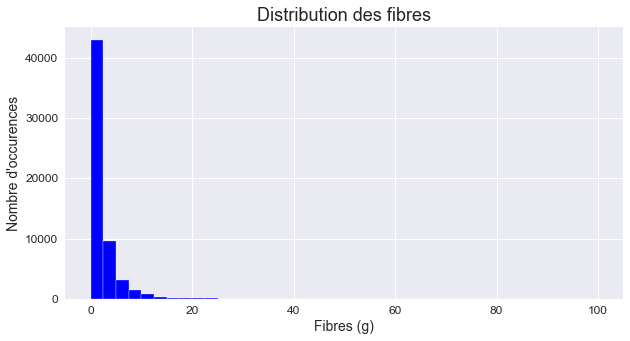

In [19]:
fig,ax = plt.subplots(figsize=(10,5))

ax.hist(df['fiber_100g'].dropna(),bins=40,histtype='bar',color='blue',edgecolor="white",range=(0, 100))
ax.set_title("Distribution des fibres",size=18)
ax.set_xlabel("Fibres (g)",size=14)
ax.set_ylabel("Nombre d'occurences",size=14)
ax.tick_params(labelsize=12)

plt.show()

Remarque :

 - Distribution excentrée vers la gauche 
 - La plupart des produits contiennent entre 0 et 5g de fibre.

##### 5-e: Le Sel

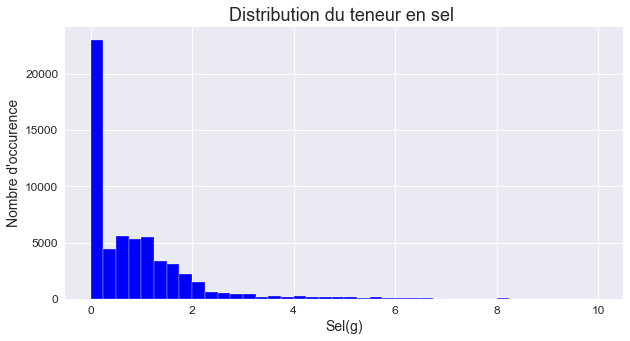

In [20]:
fig,ax = plt.subplots(figsize=(10, 5))

ax.hist(df['salt_100g'].dropna(),bins=40,histtype='bar',color='blue',edgecolor="white",range=(0,10))
ax.set_title("Distribution du teneur en sel ",size=18)
ax.set_xlabel("Sel(g)",size=14)
ax.set_ylabel("Nombre d'occurence",size=14)
ax.tick_params(labelsize=12)

plt.show()

Remarque :

 - Distribution excentrée vers la gauche 
 - La plupart des produits contiennent moins de 2g de sel.

In [21]:
#Les produits les plus salés sont les sels - elle mêmes
df.nlargest(5,'salt_100g') 

url  \
10028  http://world-fr.openfoodfacts.org/produit/3166...   
11513  http://world-fr.openfoodfacts.org/produit/3183...   
14596  http://world-fr.openfoodfacts.org/produit/3245...   
17057  http://world-fr.openfoodfacts.org/produit/3250...   
22334  http://world-fr.openfoodfacts.org/produit/3263...   

                          product_name                   brands  \
10028           Moulin Sel de Guérande                   Ducros   
11513  Véritable sel de mer la baleine               La baleine   
14596                  Sel de Guérande        Reflets de France   
17057              Sel fin de Guerande  Itineraires des saveurs   
22334        Sel fin iodé - sel de mer             Leader Price   

                                        ingredients_text nutrition_grade_fr  \
10028               Sel marin gris de table de Guérande.                  c   
11513                                                NaN                  c   
14596                           sel de Guérande IGP 100%                  c   
17057                                                NaN                  c   
22334  sel de mer, iodate de potassium (15 à 20mg/kg)...                  c   

      pnns_groups_1  energy_100g  fat_100g  saturated-fat_100g  \
10028       unknown     1.912046       0.0                 0.1   
11513       unknown     0.000000       0.0                 0.0   
14596       unknown     0.000000       0.0                 0.0   
17057       unknown     0.000000       0.0                 0.0   
22334       unknown     0.000000       0.0                 0.0   

       carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
10028                 0.0          0.0         0.0           0.08      100.0   
11513                 0.0          0.0         0.0           0.00      100.0   
14596                 0.0          0.0         0.0           0.00      100.0   
17057                 0.0          0.0         0.0           0.00      100.0   
22334                 0.0          0.0         0.0           0.00      100.0   

       nutrition-score-fr_100g  
10028                     10.0  
11513                     10.0  
14596                     10.0  
17057                     10.0  
22334                     10.0

#### 6 ) Distribution des "Scores nutritionnel"

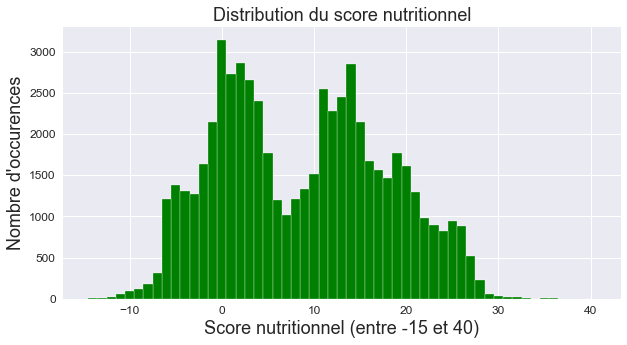

In [22]:
from turtle import width


fig, ax = plt.subplots(figsize=(10,5))

ax.bar(x=df["nutrition-score-fr_100g"].value_counts().index,
       height= df["nutrition-score-fr_100g"].value_counts(),
       color ="green",edgecolor="white",width= 1)

ax.set_title("Distribution du score nutritionnel",size=18)
ax.set_xlabel("Score nutritionnel (entre -15 et 40)",size=18)
ax.set_ylabel("Nombre d'occurences",size=18)
ax.tick_params(labelsize=12)

plt.show()


Remarque: 

 - Nous avons une distribution bi-modale autour de <strong>0 et 14</strong> de nos "score nutritionnel". 

In [23]:
#Exemple de 5 produits avec un excellent nutriscore : 

df.nsmallest(5,'nutrition-score-fr_100g')

url  \
11989  http://world-fr.openfoodfacts.org/produit/3222...   
19592  http://world-fr.openfoodfacts.org/produit/3256...   
25218  http://world-fr.openfoodfacts.org/produit/3270...   
51291  http://world-fr.openfoodfacts.org/produit/5411...   
8006   http://world-fr.openfoodfacts.org/produit/3083...   

                     product_name     brands     ingredients_text  \
11989  Choux-fleurs en fleurettes     Casino    100% choux-fleurs   
19592        Lentilles corail bio    U Bio,U                  NaN   
25218                Fèves pelées     Picard           Fève pelée   
51291        Edamamé Beans Nature       Lima  Edamamé (soja), Eau   
8006                  Fèves fines  Bonduelle                Fèves   

      nutrition_grade_fr          pnns_groups_1  energy_100g  fat_100g  \
11989                  a  Fruits and vegetables    70.028681       2.0   
19592                  a  Fruits and vegetables   115.917782       1.3   
25218                  a  Fruits and vegetables   104.445507       0.8   
51291                  a  Fruits and vegetables   110.181644       6.4   
8006                   a  Fruits and vegetables    82.934990       0.5   

       saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
11989                 0.5                 4.7          4.1         3.6   
19592                 0.2                12.4          1.1         8.0   
25218                 0.1                12.0          1.1         5.4   
51291                 1.0                 2.4          1.0         3.6   
8006                  0.1                 9.5          1.4         6.7   

       proteins_100g  salt_100g  nutrition-score-fr_100g  
11989            6.5     0.0200                    -14.0  
19592            9.7     0.0000                    -14.0  
25218            9.4     0.0400                    -14.0  
51291           10.8     0.0762                    -14.0  
8006             6.8     0.0000                    -13.0

RESUMER ANALYSE UNIVARIEES A COMPLETER 

### Analyse mutlivariée 

#### 1) Corrélation entre les variables nutritives  

C:\Users\mehme\AppData\Local\Temp\ipykernel_6584\1897729370.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr,dtype=np.bool)


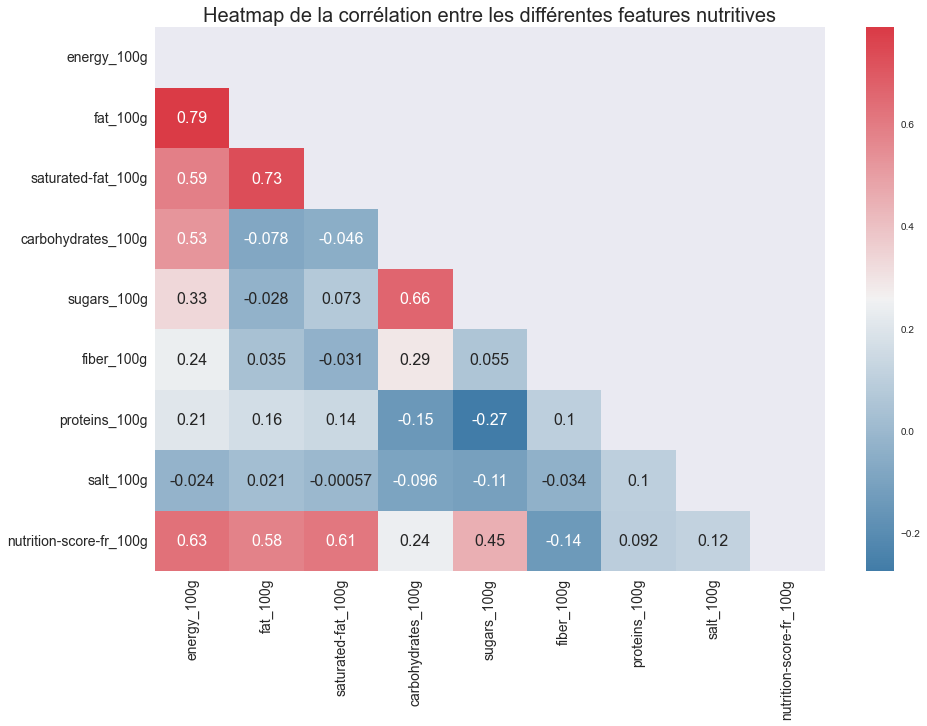

In [24]:
corr = df.corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig,ax = plt.subplots(figsize=(15,10))
cmap= sns.diverging_palette(240,10,as_cmap=True)
ax = sns.heatmap(corr,mask=mask,cmap=cmap,annot=True,annot_kws={"size":16})
ax.set_title("Heatmap de la corrélation entre les différentes features nutritives",size=20)
ax.tick_params(labelsize=14)

plt.show()

Remarque :
 - Forte corrélation entre: 
    * fat_100g <=> saturated-fat_100g
    * sugar_100g <=> carbohydrates_100g 
    * nutrition-score-fr <=> energy | fat | saturated-fat | sugar 
 - Faible corrélation entre : 
    * Fiber & Protein & salt 

== > Globalement les features ayant un plus grand import calorique semblent plus corrélé les unes envers les autres . 

d:\COURS LP DATA RIZZA\python anaconda 3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


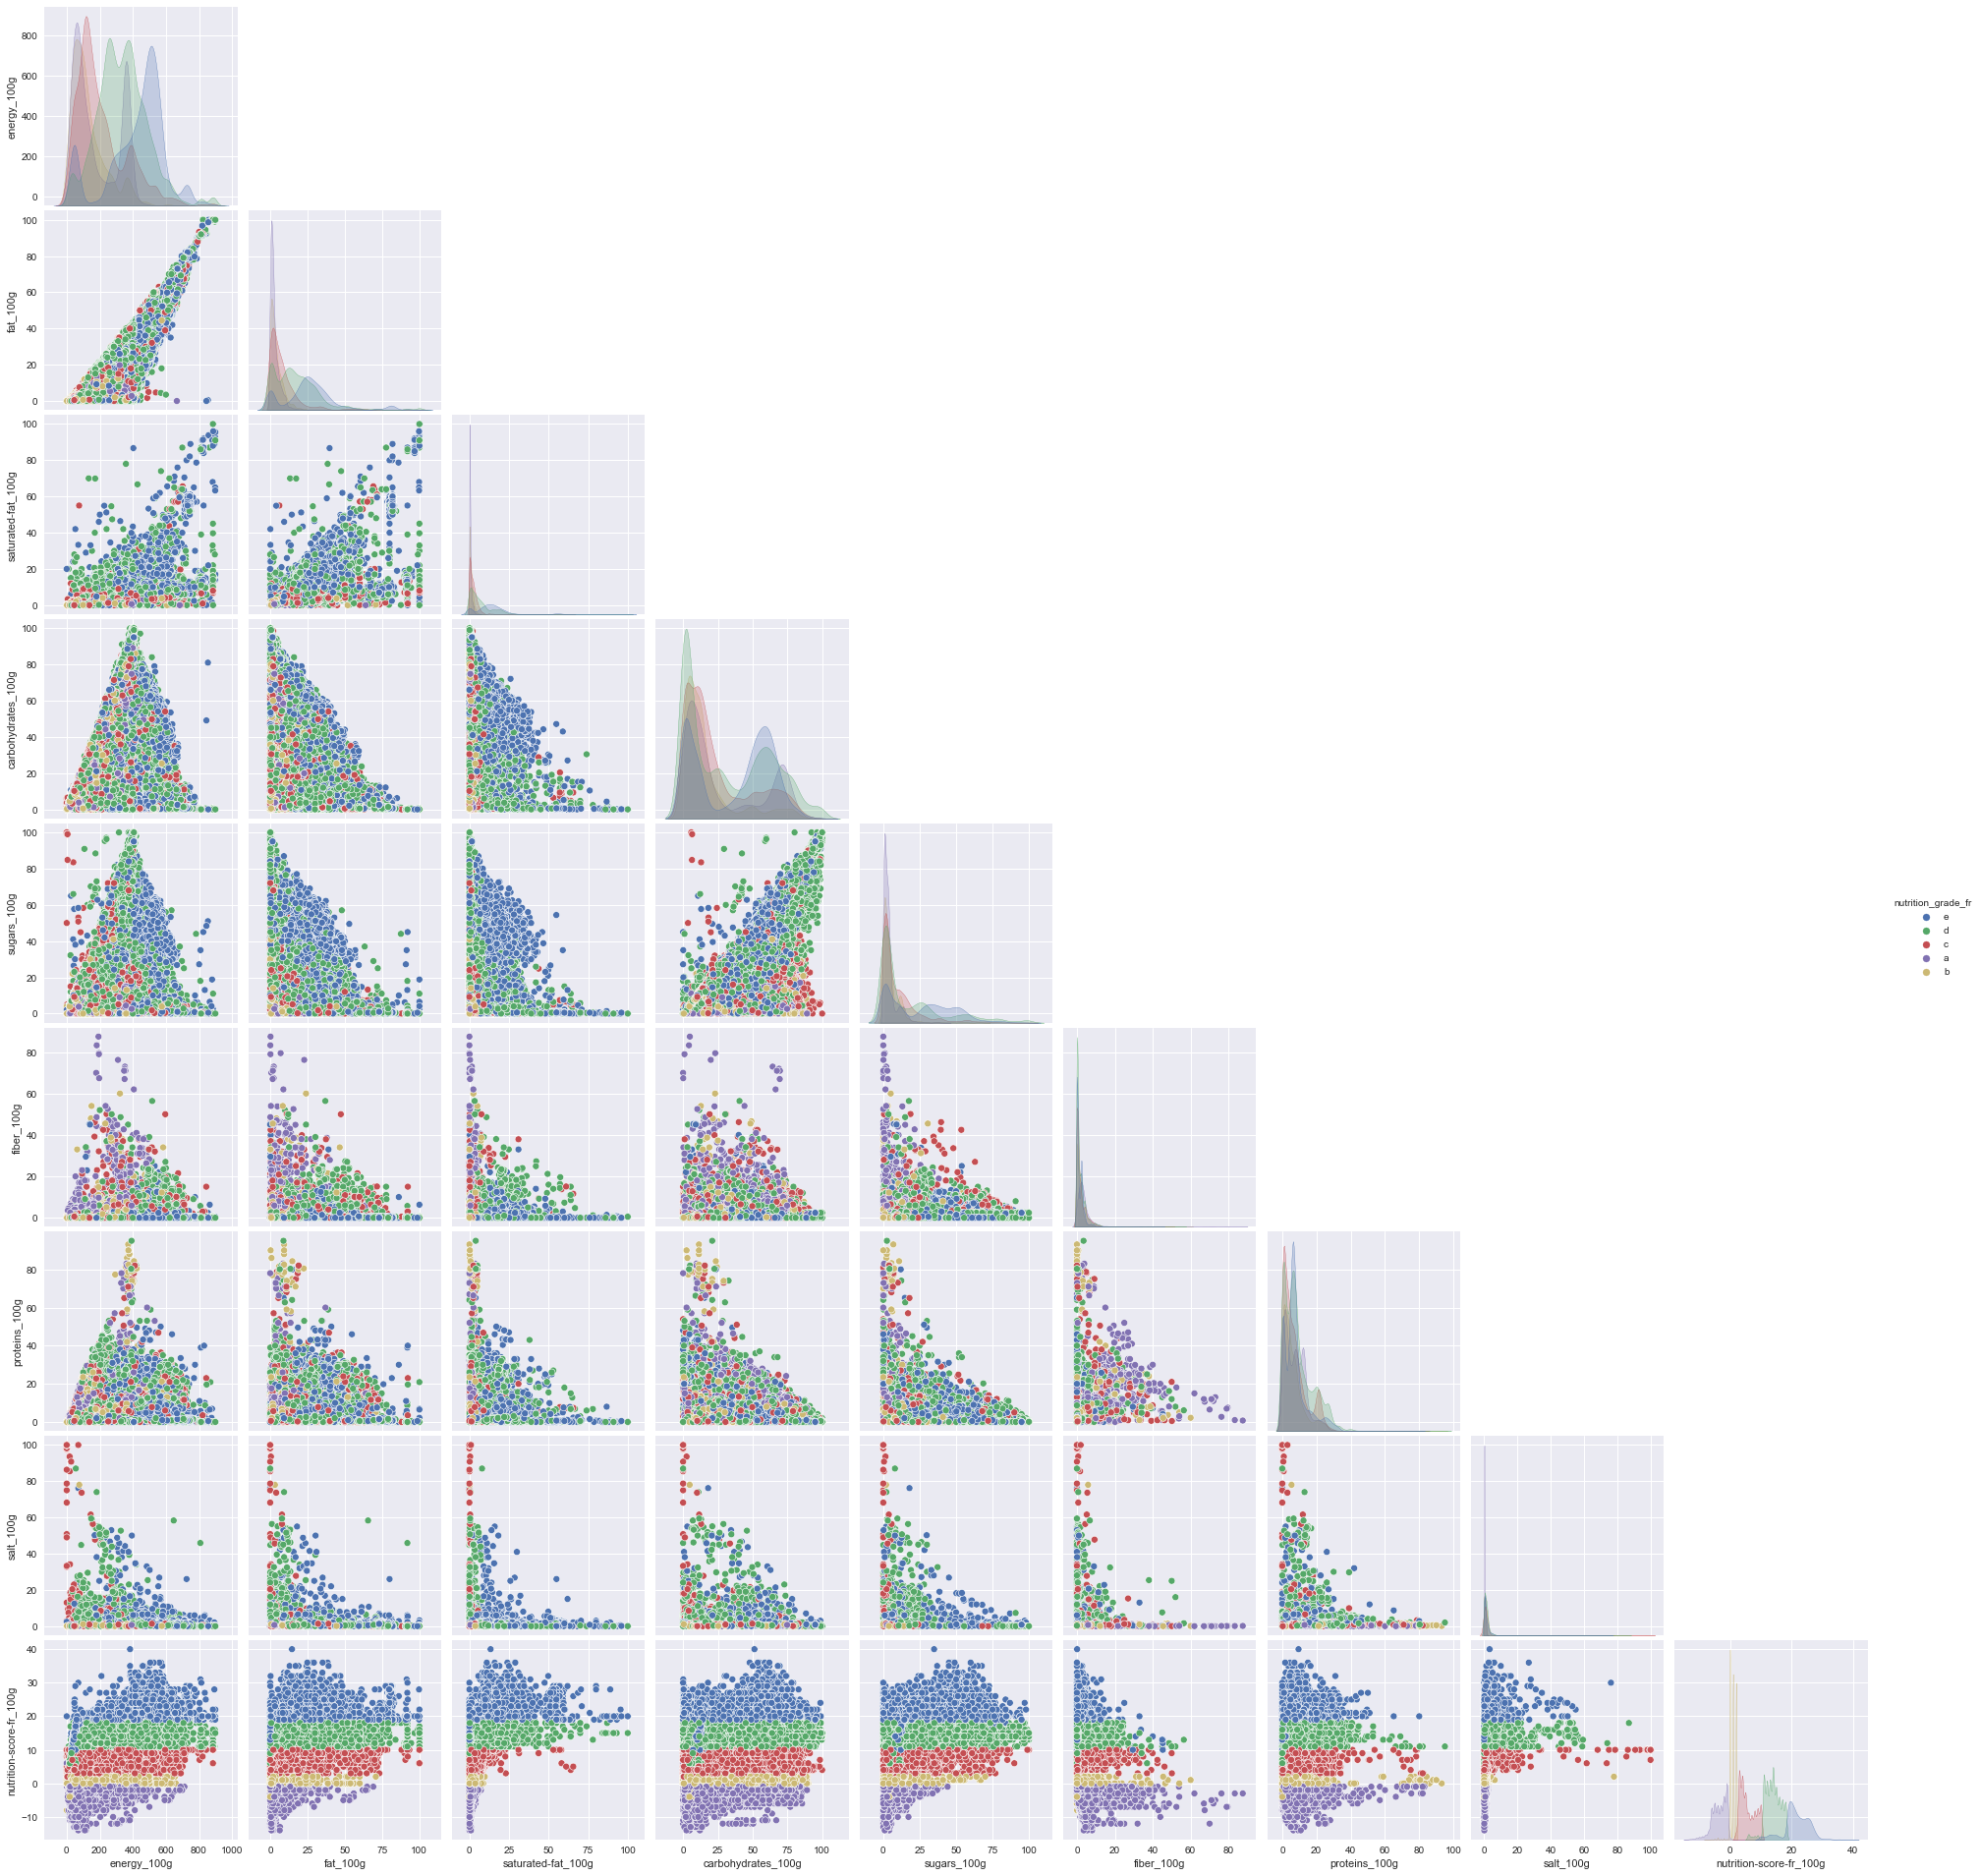

In [25]:
#Ensemble des répartitions des notes de nutriscore en fonction des différentes features :

df_temp = df.loc[:, 'nutrition_grade_fr': 'nutrition-score-fr_100g'].drop('pnns_groups_1', axis=1).dropna()

g = sns.pairplot(df_temp, hue='nutrition_grade_fr', height=3)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()

Remarque : 
légende =  A= Violet  B= Jaune   C= Rouge  D= Vert  E=Blue 

- si on observe la répartition des différentes notes selon les différents macro-nutriments : 

     * Pour les : "fat" | "saturated-fat" | "salt" : nous avons plus grandes présente de  mauvaise note par rapport à la quantité de ces mêmes éléments .
     * A l'inverse des Protéines et des fibres qui ont plus de note positives ( de A et B) toujours par rapport à la quantité de ces mêmes élements .

     * Enfin cette analyse nous montre déjà des relations possible entre certaines variables. On remarque également le regroupement par Nutrigrade sur la plupart des features. 

#### 2) Analyse bivariée entre variables nutritives 

##### Sommaire : 
 - 1. Entre Energie (kcal) // Lipides (g) 
 - 2. Entre Energie (kcal) // Glucides(g)
 - 3. Saturated -Fat (g) // lipide (g)
 - 4. Sugar(g) // Glucides (g)

2-1. Entre Energie (kcal) // Lipides (g) 

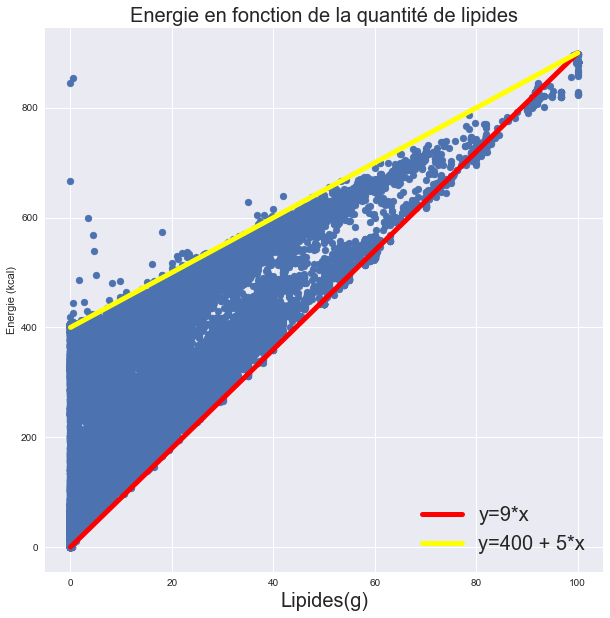

In [26]:
#Graphique Energie // quantité de lipides : 
#Note : 1g de lipides = 9kcal | 1g de Glucides = 4kcal | 1g de protéines = 4kcal
fig,ax = plt.subplots(figsize=(10,10))

x = np.linspace(0,100)
y1 = 9*x
y2 = 400 + 5*x

ax.scatter(df['fat_100g'], df['energy_100g'])
ax.plot(x,y1,color='red', linewidth = 5 ,label ="y=9*x")
ax.plot(x,y2,color='yellow', linewidth = 5 ,label ="y=400 + 5*x")
ax.set(xlabel="Lipides(g)",ylabel="Energie (kcal)",
        title="Energie en fonction de la quantité de lipides")

ax.xaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)
ax.legend(loc="lower right",prop ={'size':20})

plt.show()

Remarque : 
N.B : Fat = > Lipide (essentiellement ) || Apport Energetique = Glucides + lipides + Protéines . //  1g de lipides(L) = 9kcal | 1g de Glucides(G) = 4kcal | 1g de protéines(P) = 4kcal

 - Nous pouvons voir que l'apport énergétique est fortement dépendant de la quantité de lipide ,d'ou une forte corrélation (r= 0,79) entre ces 2 variables .

      * => On le comprend facilement dû fait que les lipdes sont plus denses et ont un apport énergétique plus élevé que les autres nutriments : Lipide ou Glucide. <br></br>
       
 - Par conséquent, l'apport énergétique est essentiellement compris entre les produits composés seulement de lipide (droite Rouge) et les produits à multiple composante (L+P+G : droite Jaune) . 


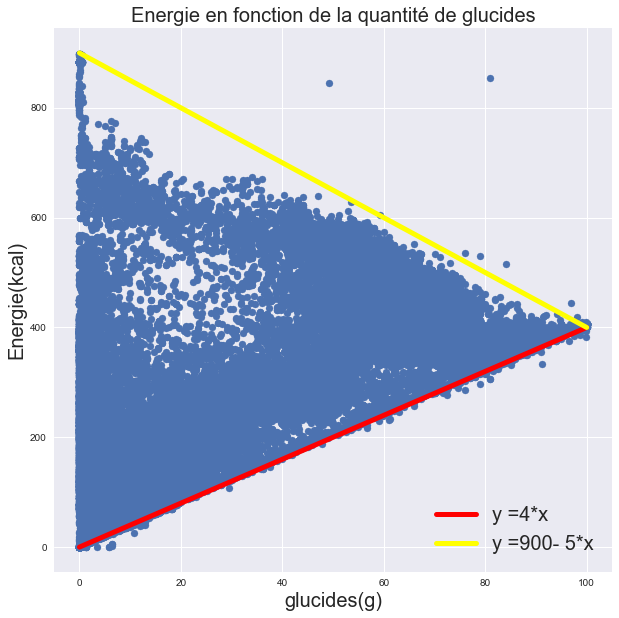

In [27]:
#Graphique Energie // quantité de glucides : 
#Note : 1g de lipides = 9kcal | 1g de Glucides = 4kcal | 1g de protéines = 4kcal

fig,ax = plt.subplots(figsize=(10,10))

x = np.linspace(0,100)
y1 = 4*x
y2= 900 -5*x

ax.scatter(df["carbohydrates_100g"],df["energy_100g"])
ax.plot(x,y1,color="red",linewidth=5,label="y =4*x")
ax.plot(x,y2,color="yellow",linewidth=5,label="y =900- 5*x")
ax.set(xlabel="glucides(g)",ylabel="Energie(kcal)",
        title="Energie en fonction de la quantité de glucides")

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)
ax.legend(loc="lower right",prop={'size':20})

plt.show()

Remarque: 
N.B : Fat = > Lipide (essentiellement ) || Apport Energetique = Glucides + lipides + Protéines . //  1g de lipides (L) = 9kcal | 1g de Glucides(G) = 4kcal | 1g de protéines(P) = 4kcal

 - Nous savons que les glucides sont les 2ième source d'apport énergétique. 

 - Ici, nous observons que la création d'une borne en apport énergétique aux alentours de 400 kcal => donc les produits composés essentiellement de composer de glucides à 100% (droit en rouge ) et les produits composés de (L + G) en jaune. 

 - Le vide visible sur le graphe aux alentours de 20g de G [400 - 500 kcal] est dû à une absence de produit dans cette gamme là .   


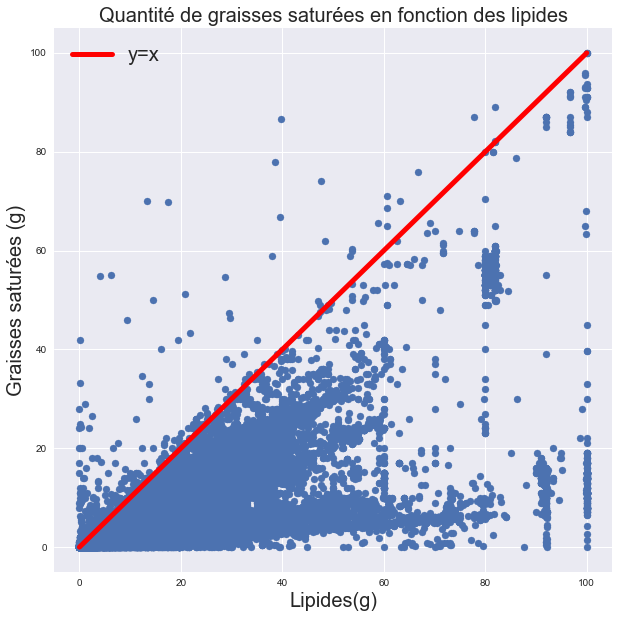

In [28]:
#Graphique Quantité de graisses saturées // quantité de Lipides  : 
#Note : 1g de lipides = 9kcal | 1g de Glucides = 4kcal | 1g de protéines = 4kcal

from turtle import title


fig,ax = plt.subplots(figsize=(10,10))

x = np.linspace(0,100)
y1=x


ax.scatter(df['fat_100g'],df["saturated-fat_100g"])
ax.plot(x,y1,color="red",linewidth=5 ,label ="y=x")

ax.set(xlabel="Lipides(g)",ylabel="Graisses saturées (g)",
        title = "Quantité de graisses saturées en fonction des lipides")

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)
ax.legend(loc ="upper left",prop={"size":20})

plt.show()




Remarque: 
N.B : Fat = > Lipide (essentiellement ) || Apport Energetique = Glucides + lipides + Protéines . //  1g de lipides (L) = 9kcal | 1g de Glucides(G) = 4kcal | 1g de protéines(P) = 4kcal

 - Forte corrélation entre Lipide et Graisse saturées : <strong> r = 0.73 </strong>
    * => En effet, certaines graisses saturées sont des lipides 
    * => L'inverse n'est pas vrai, nous avoir des produits avec beaucoup de lipides et peu de graisse saturée.   

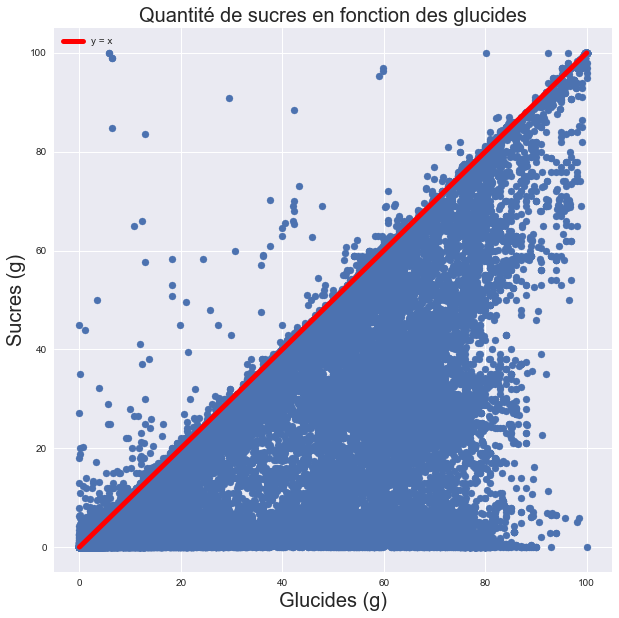

In [29]:
#Graphique Quantité de graisses sucres // quantité de glucides  : 
#Note : 1g de lipides = 9kcal | 1g de Glucides = 4kcal | 1g de protéines = 4kcal
fig, ax = plt.subplots(figsize=(10, 10))

x = np.linspace(0, 100)
y1 = x


ax.scatter(df['carbohydrates_100g'], df['sugars_100g'])
ax.plot(x, y1, color='r', linewidth=5, label="y = x")

ax.set(xlabel='Glucides (g)', ylabel='Sucres (g)', 
       title="Quantité de sucres en fonction des glucides")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)
ax.legend(loc="upper left", prop={'size':10})


plt.show()

Remarque: 
N.B : Fat = > Lipide (essentiellement ) || Apport Energetique = Glucides + lipides + Protéines . //  1g de lipides (L) = 9kcal | 1g de Glucides(G) = 4kcal | 1g de protéines(P) = 4kcal

 - De même, pour les lipides et graisses saturées : les sucres et les glucides ont un forte corrélations -> <strong> r = 0.66 </strong>

  -  => Les sucres font partie des Glucides, mais l'inverse n'est pas vrai; exemple du Fructose . (voir -> note* )

note* : Un glucide est une classe de composés organiques. Il existe deux types de glucides : les glucides simples et les glucides complexes. Les glucides simples comprennent le glucose, le fructose et le galactose qui peuvent à leur tour former du saccharose (= sucre de table), du lactose ou du maltose. Les glucides complexes comprennent l’amidon, le glycogène ainsi que les fibres


#### 3) Analyse des variables nutritives sur le score nutritionnel 
    
    Sommaire :

        - A) Nutrition_grade_fr // Energie (kcal)
        - B) Nutrition_grade_fr // Lipide (g)
        - C) Nutrition_grade_fr // Graisse saturé (g)
        - D) Nutrition_grade_fr // Glucide (g)
        - E) Nutrition_grade_fr // Sucres (g)
        - F) Nutrition_grade_fr // Protéine (g)
        - G) Nutrition_grade_fr // Fibres (g)
        - H) Nutrition_grade_fr // Sel (g)


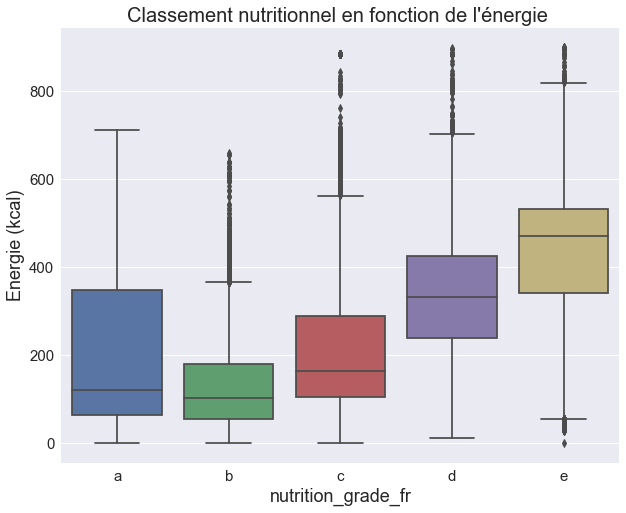

In [30]:
#Graphique - A) Nutrition_grade_fr // Energie (g)
#Note : ("Bonne") A < - B -.. <- E ("Mauvais")

fig,ax = plt.subplots(figsize=(10,8))

ax = sns.boxplot(x="nutrition_grade_fr",y="energy_100g",data=df ,order=["a","b","c","d","e"])

ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.tick_params(labelsize=15)

ax.set_title("Classement nutritionnel en fonction de l'énergie " ,size =20)
ax.set_ylabel("Energie (kcal)")

plt.show()

Remarque: 

  - "+" Energie élévé -> plus nutri-grades semble négative . 

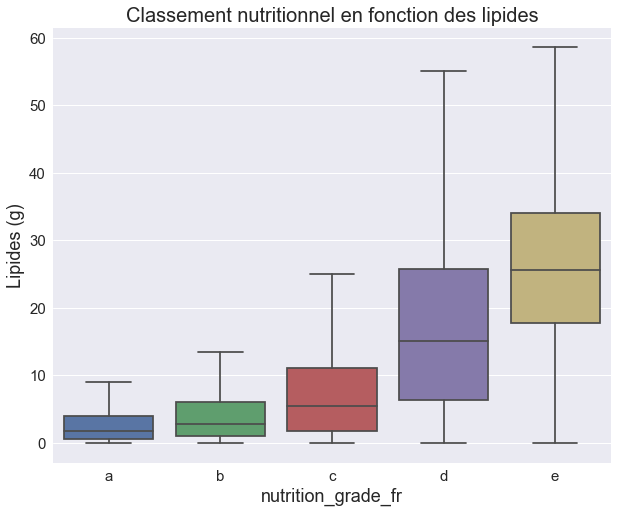

In [31]:
#Graphique - B) Nutrition_grade_fr // Lipide (g)
#Note : ("Bonne") A < - B -.. <- E ("Mauvais")

fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.boxplot(x='nutrition_grade_fr', y='fat_100g', data=df, order=['a', 'b', 'c', 'd', 'e'], sym='')

ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.tick_params(labelsize=15)

ax.set_title("Classement nutritionnel en fonction des lipides", size=20)
ax.set_ylabel('Lipides (g)')

plt.show()

Remarque: 

  - "+" Qt de lipide est élévé -> plus nutri-grades semble négative . 

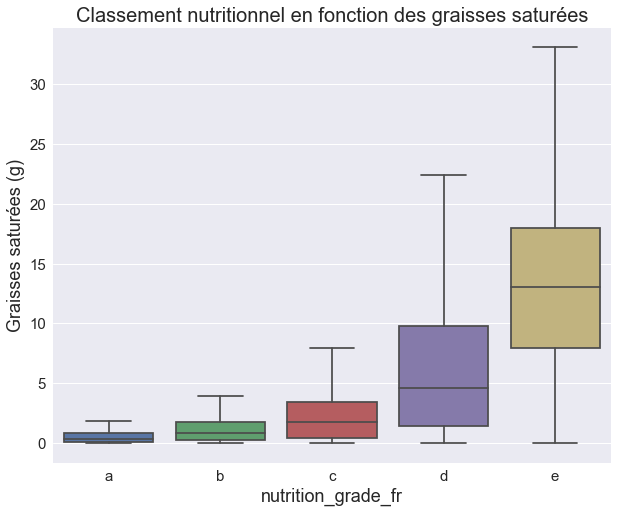

In [32]:
#Graphique - C) Nutrition_grade_fr // Graisse saturé (g)
#Note : ("Bonne") A < - B -.. <- E ("Mauvais")

fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.boxplot(x='nutrition_grade_fr', y='saturated-fat_100g', data=df, order=['a', 'b', 'c', 'd', 'e'], sym='')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.tick_params(labelsize=15)
ax.set_title("Classement nutritionnel en fonction des graisses saturées", size=20)
ax.set_ylabel('Graisses saturées (g)')

plt.show()

Remarque: 

  - "+" Qt de graisse saturée est élévé -> plus nutri-grades semble négative .

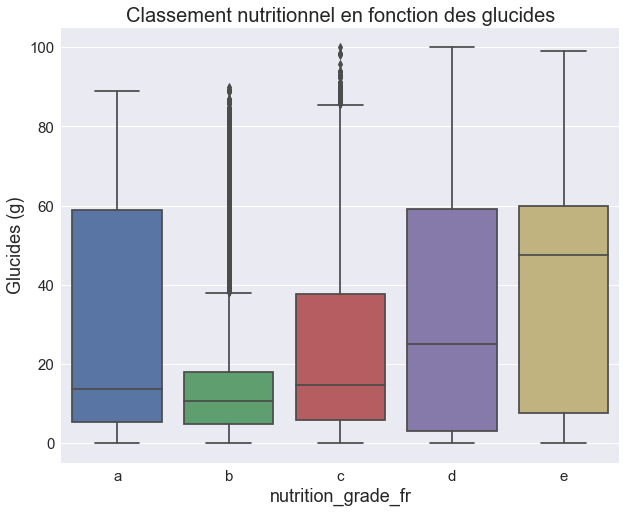

In [33]:
#Graphique - D) Nutrition_grade_fr // Glucide (g)
#Note : ("Bonne") A < - B -.. <- E ("Mauvais")

fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.boxplot(x='nutrition_grade_fr', y='carbohydrates_100g', data=df, order=['a', 'b', 'c', 'd', 'e'])
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.tick_params(labelsize=15)
ax.set_title("Classement nutritionnel en fonction des glucides", size=20)
ax.set_ylabel('Glucides (g)')

plt.show()

Remarque : 
  
  - Pour des intervalles de [15- 60]g de Glucide :
     * Nous avons Q3 =  A | D | E 
     * Nous avons Médian(A) < Med(D) < Med(E)
     * Nous avons Q1 (D) < Q1(A) < Q1( D)

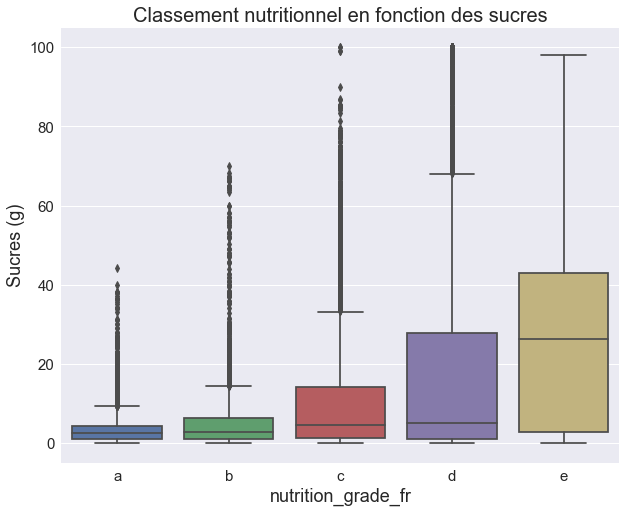

In [34]:
#Graphique - E) Nutrition_grade_fr // Sucres (g)
#Note : ("Bonne") A < - B -.. <- E ("Mauvais")

fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.boxplot(x='nutrition_grade_fr', y='sugars_100g', data=df, order=['a', 'b', 'c', 'd', 'e'])
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.tick_params(labelsize=15)
ax.set_title("Classement nutritionnel en fonction des sucres", size=20)
ax.set_ylabel('Sucres (g)')

plt.show()

Remarque: 

  - "+" Qt de sucre est élévé -> plus nutri-grades semble négative .

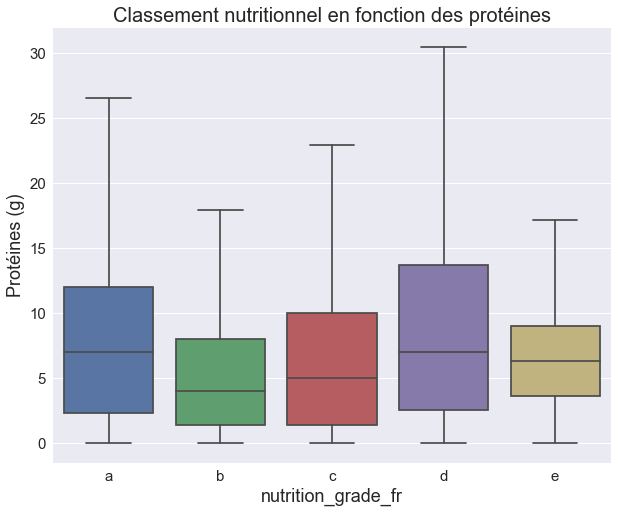

In [35]:
#Graphique - F) Nutrition_grade_fr // Protéine (g)
#Note : ("Bonne") A < - B -.. <- E ("Mauvais")

fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.boxplot(x='nutrition_grade_fr', y='proteins_100g', data=df, order=['a', 'b', 'c', 'd', 'e'], sym='')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.tick_params(labelsize=15)
ax.set_title("Classement nutritionnel en fonction des protéines", size=20)
ax.set_ylabel('Protéines (g)')

plt.show()

Remarque : 

 - Répartion de quantité de P sur l'ensemble des nutri-grade globalement homogène.  

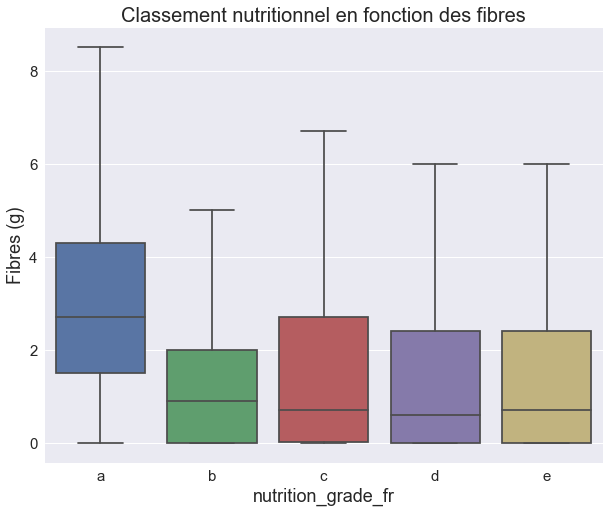

In [36]:
#Graphique -F) Nutrition_grade_fr // Fibres (g)
#Note : ("Bonne") A < - B -.. <- E ("Mauvais")
fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.boxplot(x='nutrition_grade_fr', y='fiber_100g', data=df, order=['a', 'b', 'c', 'd', 'e'], sym='')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.tick_params(labelsize=15)
ax.set_title("Classement nutritionnel en fonction des fibres", size=20)
ax.set_ylabel('Fibres (g)')

plt.show()

Remarque: 

  -  "+" Qt de Fibre est élévé -> pour le nutri-grade A .
  -   Q1 = au MIn pour : B - C - D - E

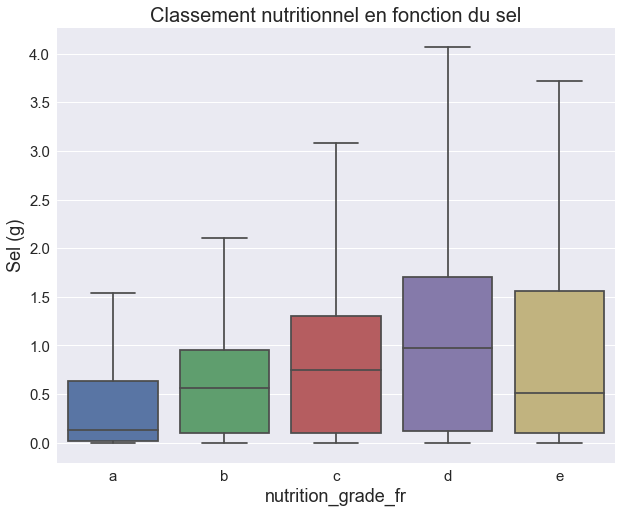

In [37]:
#Graphique - G) Nutrition_grade_fr // Sel (g)
#Note : ("Bonne") A < - B -.. <- E ("Mauvais")
fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.boxplot(x='nutrition_grade_fr', y='salt_100g', data=df, order=['a', 'b', 'c', 'd', 'e'], sym='')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.tick_params(labelsize=15)
ax.set_title("Classement nutritionnel en fonction du sel", size=20)
ax.set_ylabel('Sel (g)')

plt.show()

Remarque: 

  - "+" Qt de sels est élévé -> plus nutri-grades semble négative 

#### 4) Analyse des variables nutritives sur les catégories
    
    Sommaire :

        - A) catégories // Energie (kcal)
        - B) catégories // Lipide (g)
        - C) catégories // Graisse saturé (g)
        - D) catégories // Glucide (g)
        - E) catégories // Sucres (g)
        - F) catégories // Protéine (g)
        - G) catégories // Fibres (g)
        - H) catégories // Sel (g)


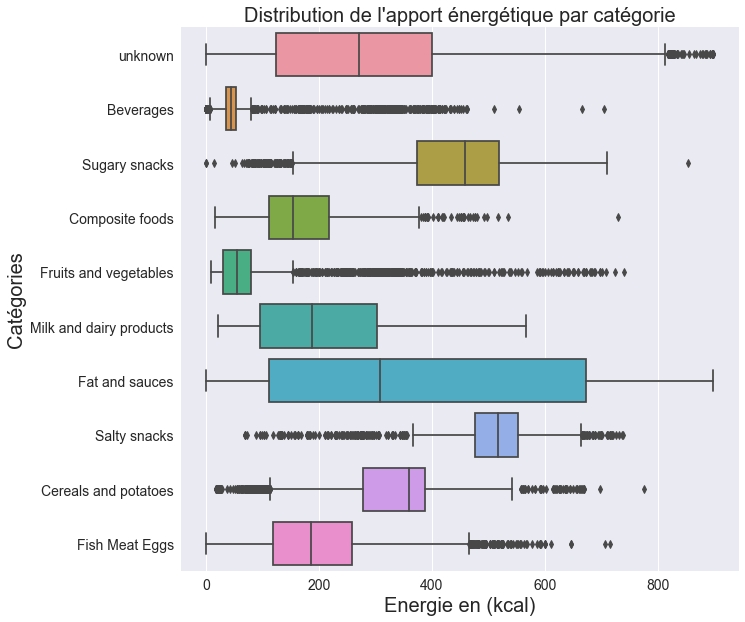

In [38]:
#Graphique -A) catégories // Energie (kcal)

fig,ax = plt.subplots(figsize=(10,10))

ax= sns.boxplot(x='energy_100g',y="pnns_groups_1",data=df)
ax.set_title("Distribution de l'apport énergétique par catégorie",size =20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set_xlabel("Energie en (kcal)")
ax.set_ylabel("Catégories")
ax.tick_params(labelsize=14)

plt.show()


Remarques : 

 - "-" Energie(kcal) -> pour les categ : Beverages | Fruit & vegetables 
 - "+" Energie(kcal) -> pour les categ : Sugary snacks | Salty snacks 


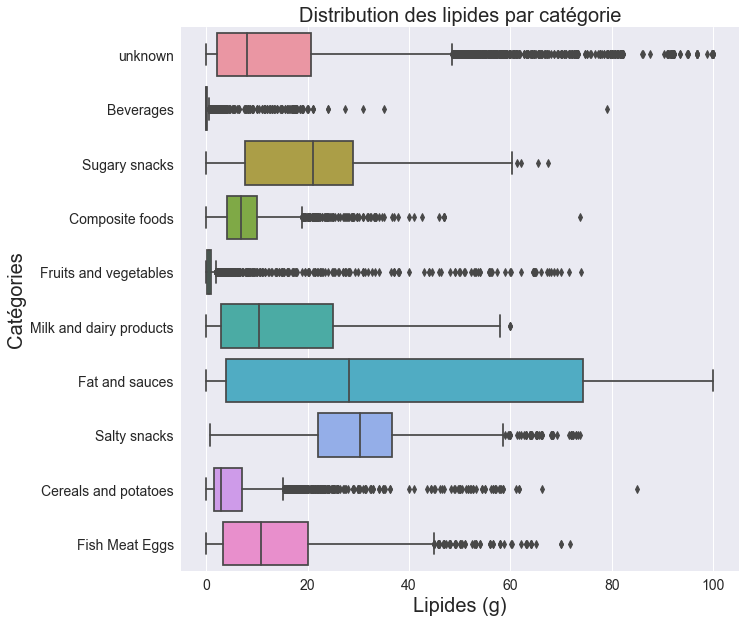

In [39]:
#Graphique -B) catégories // Lipide (g)

fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.boxplot(x='fat_100g', y='pnns_groups_1', data=df)
ax.set_title("Distribution des lipides par catégorie", size=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set_ylabel("Catégories")
ax.set_xlabel("Lipides (g)")
ax.tick_params(labelsize=14)

plt.show()

Remarques : 

 - "-" Lipides (g) -> pour les categ : Beverages | Fruit & vegetables 
 - "+" Lipides (g) -> pour les categ : Fat and Sauces | Salty snacks 

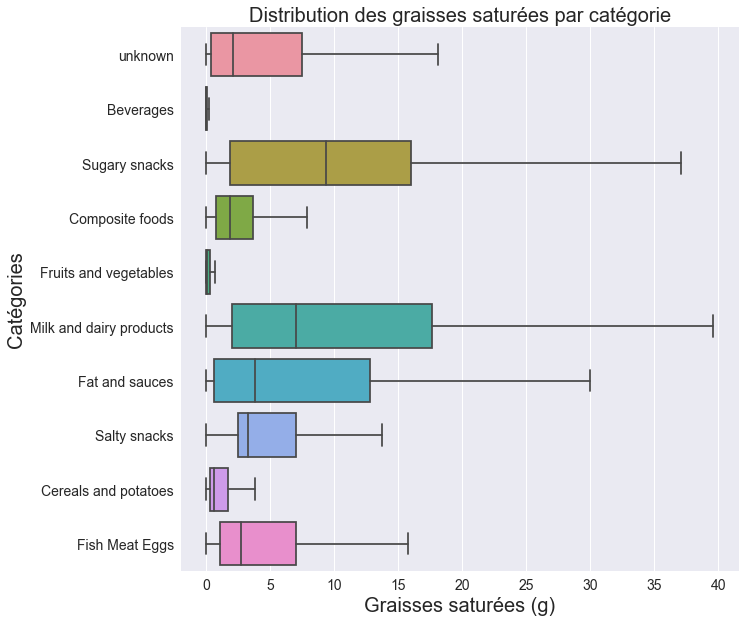

In [40]:
#Graphique -C) catégories // Graisse saturé (g)

fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.boxplot(x='saturated-fat_100g', y='pnns_groups_1', data=df, sym='')
ax.set_title("Distribution des graisses saturées par catégorie", size=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set_ylabel("Catégories")
ax.set_xlabel("Graisses saturées (g)")
ax.tick_params(labelsize=14)

plt.show()

Remarques : 

 - "-" Graisses saturées (g) -> pour les categ : Beverages | Fruit & vegetables 
 - "+" Graisses saturées (g) -> pour les categ : Sugary snacks | Milk and dairy product

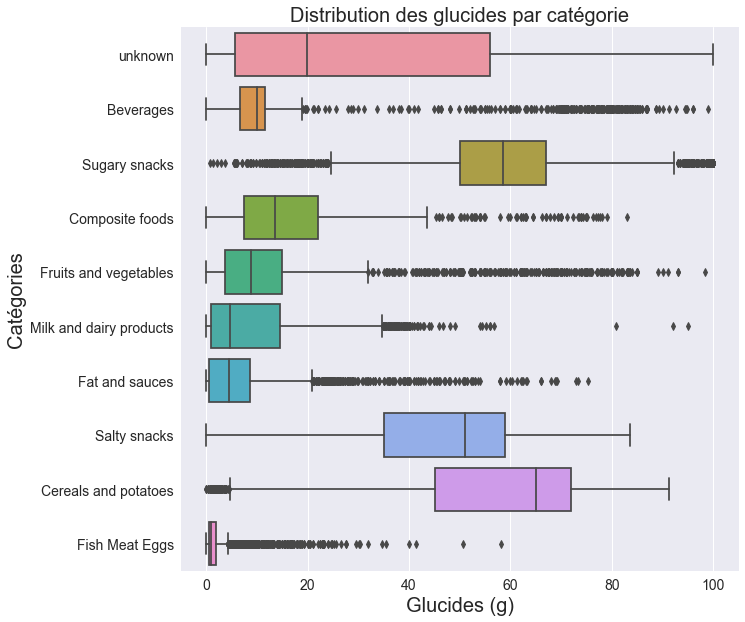

In [41]:
#Graphique - D) catégories // Glucide (g)
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.boxplot(x='carbohydrates_100g', y='pnns_groups_1', data=df)
ax.set_title("Distribution des glucides par catégorie", size=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set_ylabel("Catégories")
ax.set_xlabel("Glucides (g)")
ax.tick_params(labelsize=14)

plt.show()

Remarques : 

 - "-" Graisses glucides (g) -> pour les categ : Beverages | Fat and sauces 
 - "+" Graisses glucides(g) -> pour les categ : Sugary snacks | Cereals and potatoes

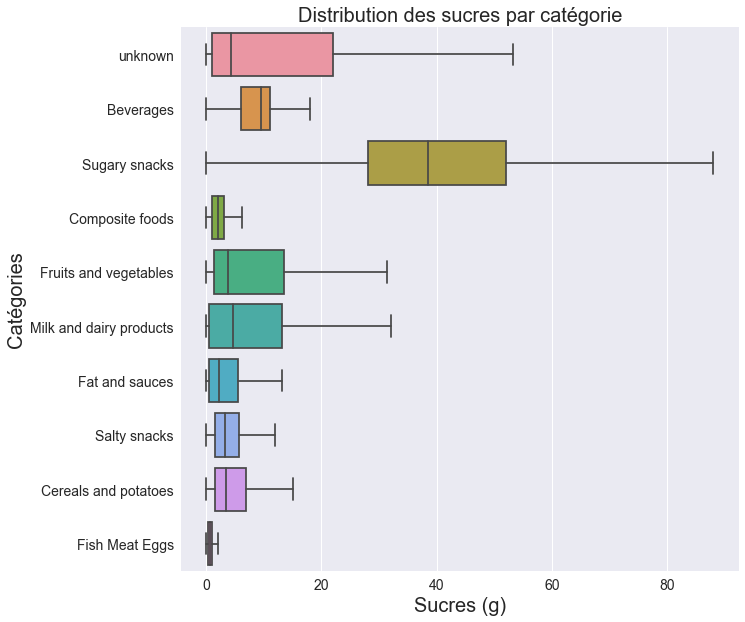

In [42]:
#Graphique - E) catégories // Sucres (g)

fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.boxplot(x='sugars_100g', y='pnns_groups_1', data=df, sym='')
ax.set_title("Distribution des sucres par catégorie", size=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set_ylabel("Catégories")
ax.set_xlabel("Sucres (g)")
ax.tick_params(labelsize=14)

plt.show()

Remarques : 

 - "-" Graisses sucres (g) -> pour les categ : Composite foods | Fish Meat Eggs
 - "+" Graisses sucres (g) -> pour les categ : Sugary snacks 

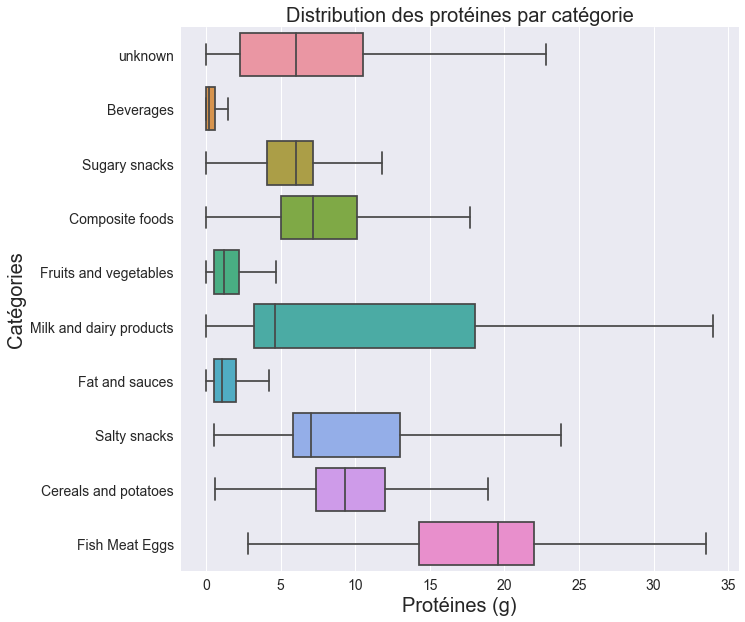

In [43]:
#Graphique - F) catégories // Protéine (g)
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.boxplot(x='proteins_100g', y='pnns_groups_1', data=df, sym='')
ax.set_title("Distribution des protéines par catégorie", size=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set_ylabel("Catégories")
ax.set_xlabel("Protéines (g)")
ax.tick_params(labelsize=14)

plt.show()

Remarques : 

 - "-" Graisses protéines (g) -> pour les categ : Beverages | Fat and sauces
 - "+" Graisses protéines (g) -> pour les categ :  Fish Meat Eggs

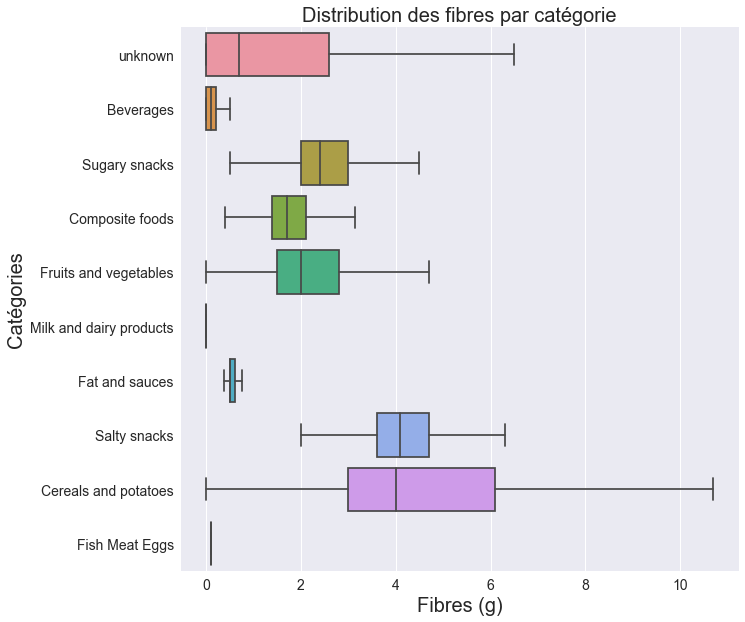

In [44]:
#Graphique - G) catégories // Fibres (g)

fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.boxplot(x='fiber_100g', y='pnns_groups_1', data=df, sym='')
ax.set_title("Distribution des fibres par catégorie", size=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set_ylabel("Catégories")
ax.set_xlabel("Fibres (g)")
ax.tick_params(labelsize=14)

plt.show()

Remarques : 

 - "-" Graisses fibres (g) -> pour les categ : Fat and sauces | Beverages
 - "+" Graisses fibres (g) -> pour les categ : Fruits and vegetables | Cereals and potatoes 

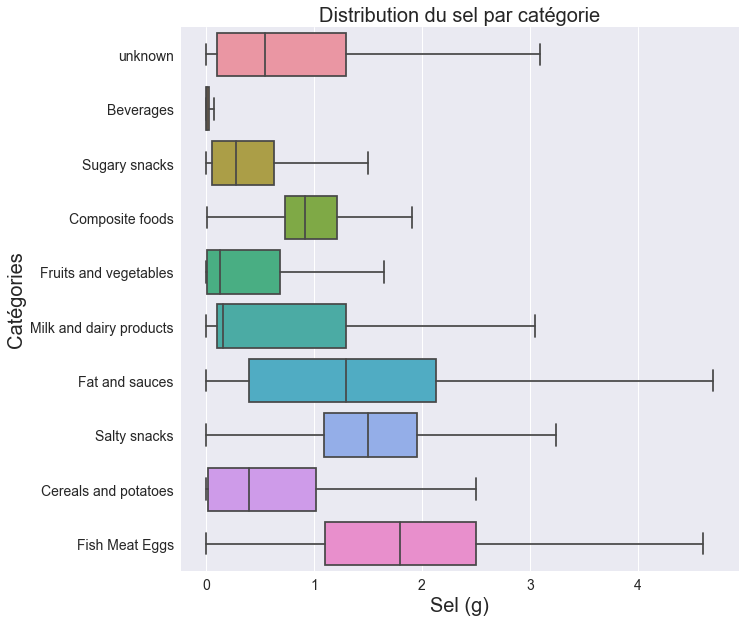

In [45]:
#Graphique - H) catégories // Sel (g)
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.boxplot(x='salt_100g', y='pnns_groups_1', data=df, sym='')
ax.set_title("Distribution du sel par catégorie", size=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set_ylabel("Catégories")
ax.set_xlabel("Sel (g)")
ax.tick_params(labelsize=14)

plt.show()

Remarques : 

 - "-" Graisses sel (g) -> pour les categ :  Beverages
 - "+" Graisses sel (g) -> pour les categ : Fat and Sauces

In [46]:
#On s'occupe ici uniquement des nutriscores et nutrigrades complétés
datas_nutri = df[(df['nutrition_grade_fr'].isnull()==False) & 
                   (df['nutrition-score-fr_100g'].isnull()==False)] 

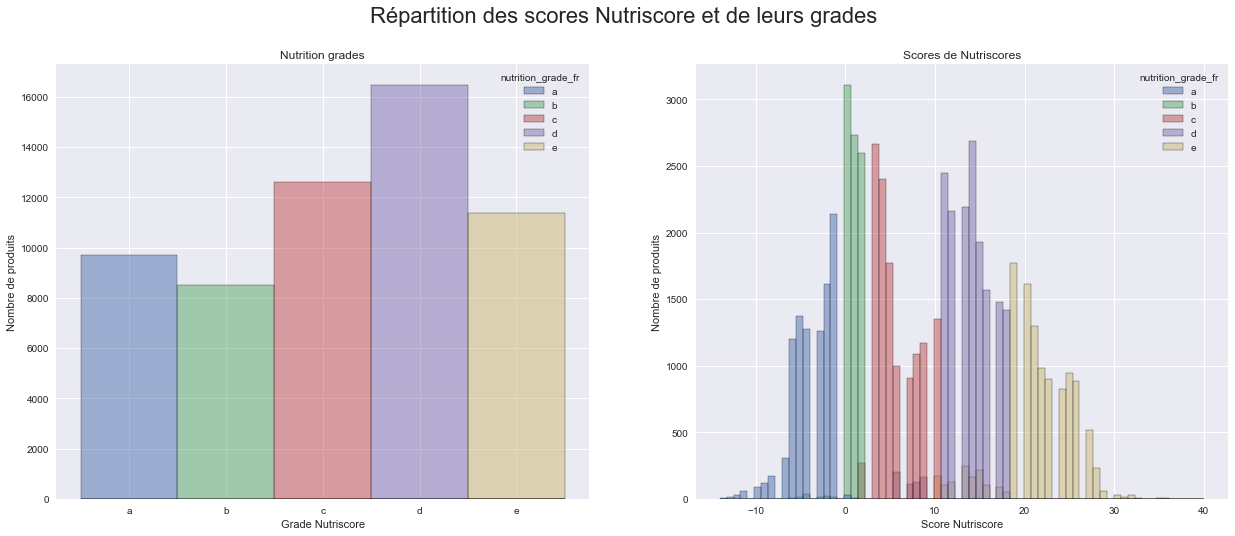

In [47]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(21,8))
fig.suptitle(r"Répartition des scores Nutriscore et de leurs grades" "\n", fontsize=22)

sns.histplot(data=datas_nutri.sort_values("nutrition_grade_fr"), x="nutrition_grade_fr", hue="nutrition_grade_fr", ax=axes[0])
axes[0].set_title('Nutrition grades')
axes[0].set_xlabel("Grade Nutriscore")
axes[0].set_ylabel("Nombre de produits")

sns.histplot(data=datas_nutri.sort_values("nutrition_grade_fr"), x="nutrition-score-fr_100g", hue="nutrition_grade_fr", ax=axes[1])
axes[1].set_title('Scores de Nutriscores')
axes[1].set_xlabel("Score Nutriscore")
axes[1].set_ylabel("Nombre de produits")

plt.show()

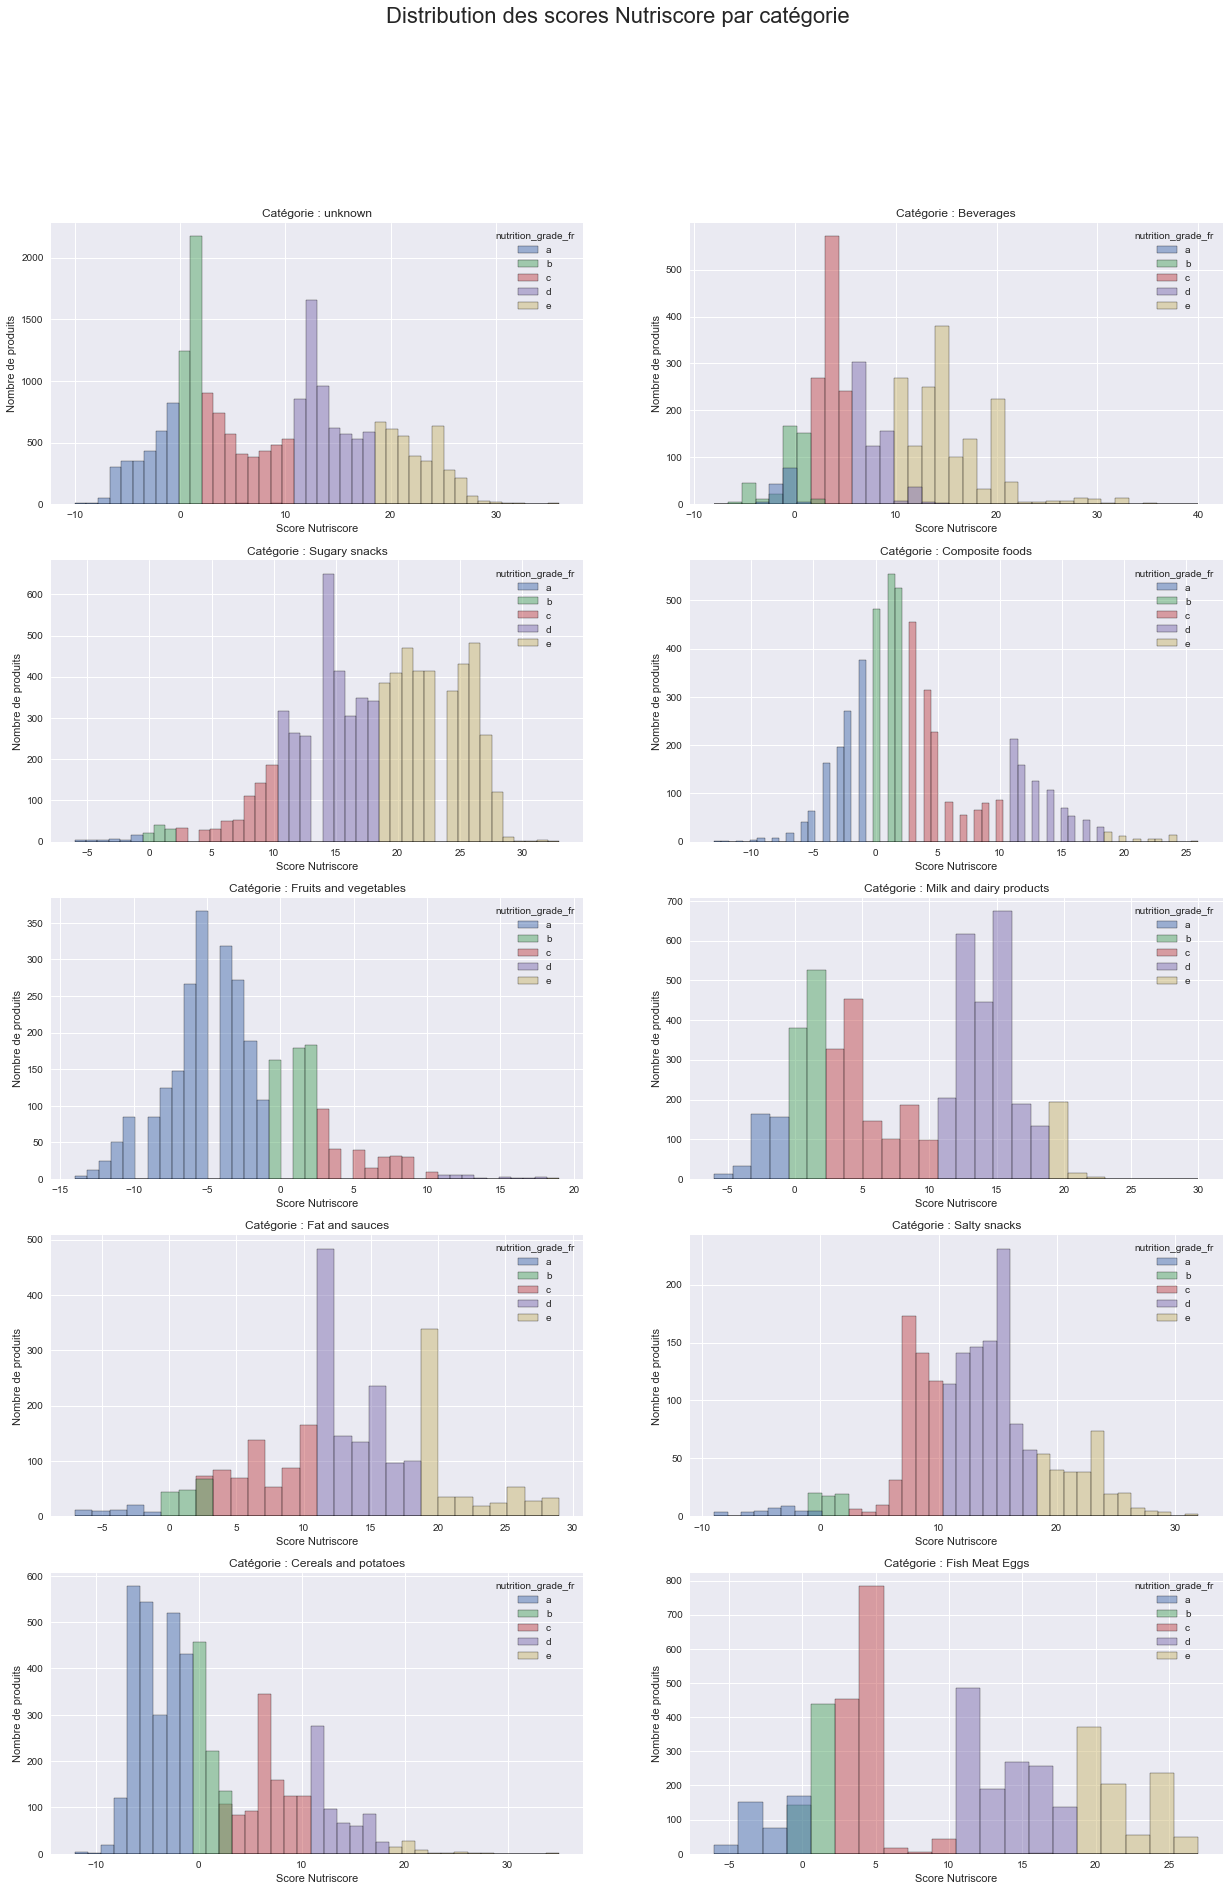

In [48]:
n_sub = len(datas_nutri['pnns_groups_1'].unique())
n_col = 2
fig, axes = plt.subplots(int(n_sub/n_col), n_col, sharex=False, sharey=False, figsize=(21,int(3*n_sub)))
axes = np.array(axes)
fig.suptitle("Distribution des scores Nutriscore par catégorie", fontsize=22)
i=0
for ax in axes.reshape(-1):
    cat = datas_nutri['pnns_groups_1'].unique()[i]
    subset = datas_nutri[datas_nutri['pnns_groups_1']==cat].sort_values("nutrition_grade_fr")
    sns.histplot(data=subset, x="nutrition-score-fr_100g", hue="nutrition_grade_fr", ax=ax)
    ax.set_title('Catégorie : {}'.format(cat))
    ax.set_xlabel("Score Nutriscore")
    ax.set_ylabel("Nombre de produits")
    i+=1
plt.show()

##### Test-Anova : PNNS_GROUP_1 
Afin de vérifier si la catégorie pnns_groups_1  influence réellement le Nutriscore, nous pouvons réaliser une ANOVA (analyse de la variance). 
Le choix de ce test est dû au fait que nous étudions 1 variable qualitative comparativement à une variable quantitative.

- Les hypothèses posées seront donc les suivantes :

  * H0 : La distribution des échantillons est similaire (et donc la catégorie n'a aucune influence sur le Nutriscore).
  * H1 : Une ou plusieurs distributions sont inégales.

- Pour commencer, nous pouvons projeter les boxplots de la répartition des nutriscores par catégorie pnns_groups_1 pour également vérifier les hypothèses de départ liées à l'ANOVA à savoir :

    * Les observations dans chaque échantillon sont indépendantes et distribuées de manière identique.
    * Les observations dans chaque échantillon ont la même variance.
    * Les observations de chaque échantillon sont normalement distribuées.

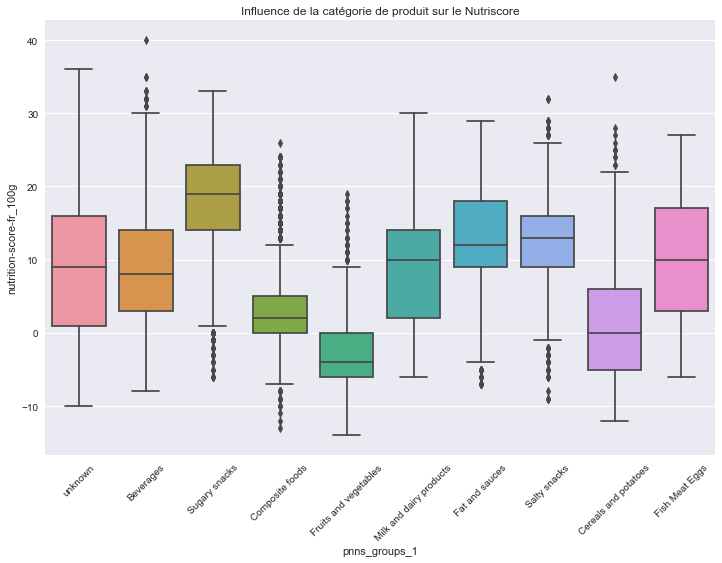

In [49]:
fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(data=datas_nutri, x='pnns_groups_1', y='nutrition-score-fr_100g')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("Influence de la catégorie de produit sur le Nutriscore")
plt.show()

Remarque : 

-  ici que les catégories semblent assez différentes, même si l'ordre de grandeur des écarts sont relativement faible. Dans les histogrammes ci-dessus, nous voyons cependant que les distributions ne   semblent pas suivre la loi normale.

- La question sera à présent de savoir si ces écarts sont significatifs ou pas via l'analyse de variance :

In [50]:
datas_nutri.head()

url  \
0  http://world-fr.openfoodfacts.org/produit/0000...   
1  http://world-fr.openfoodfacts.org/produit/0000...   
2  http://world-fr.openfoodfacts.org/produit/0000...   
3  http://world-fr.openfoodfacts.org/produit/0000...   
4  http://world-fr.openfoodfacts.org/produit/0000...   

                 product_name        brands  \
0              Lion Peanut x2      Sunridge   
1              Mini Confettis  Alice Délice   
2  Praliné Amande Et Noisette  Alice Délice   
3       Pepsi, Nouveau goût !         Pepsi   
4   Tarte Poireaux Et Lardons      Bo Frost   

                                    ingredients_text nutrition_grade_fr  \
0  Milk chocolate coating (evaporated cane juice,...                  e   
1                                                NaN                  d   
2                                                NaN                  d   
3  Eau gazéifiée, sucre, colorant caramel E150d, ...                  e   
4                                                NaN                  d   

  pnns_groups_1  energy_100g  fat_100g  saturated-fat_100g  \
0       unknown   450.047801     20.00                12.5   
1       unknown   418.977055      3.64                 0.8   
2       unknown   575.047801     37.80                 2.9   
3     Beverages    42.304015      0.00                 0.0   
4       unknown   257.887189     19.14                11.0   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0               70.00         57.5         2.5            2.5    0.09652   
1               91.32         87.7         0.9            0.6    0.01000   
2               55.20         50.3         3.9            9.5    0.00300   
3               10.40         10.4         0.0            0.0    0.02540   
4               13.30          1.0         1.4            7.5    0.80000   

   nutrition-score-fr_100g  
0                     22.0  
1                     14.0  
2                     14.0  
3                     13.0  
4                     15.0

In [51]:

import statsmodels.formula.api as smf
import statsmodels.api as sm

anova_category = smf.ols("fat_100g ~pnns_groups_1", data=datas_nutri).fit()
print(anova_category.summary())

                            OLS Regression Results                            
Dep. Variable:               fat_100g   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     2164.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:18:24   Log-Likelihood:            -2.3948e+05
No. Observations:               58715   AIC:                         4.790e+05
Df Residuals:                   58705   BIC:                         4.791e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [52]:
#Tableau d'analyse de variance
sm.stats.anova_lm(anova_category, typ=2)

sum_sq       df            F  PR(>F)
pnns_groups_1  3.980484e+06      9.0  2164.481233     0.0
Residual       1.199540e+07  58705.0          NaN     NaN

Remarque : 
- Les résultats du test de Fisher nous indiquent ici une p-value de 0 (PR>F) pour l'ensemble des catégories, donc inferieur au niveau de test de 5%. 
  
  ==> Nous rejetons donc l'hypothèse <strong>H0</strong> selon laquelle les ditributions sont identiques.
  
  ==> La catégorie de produit a donc bien une influence sur le Nutriscore.

#### 5) ANALYSE DES MARQUES 

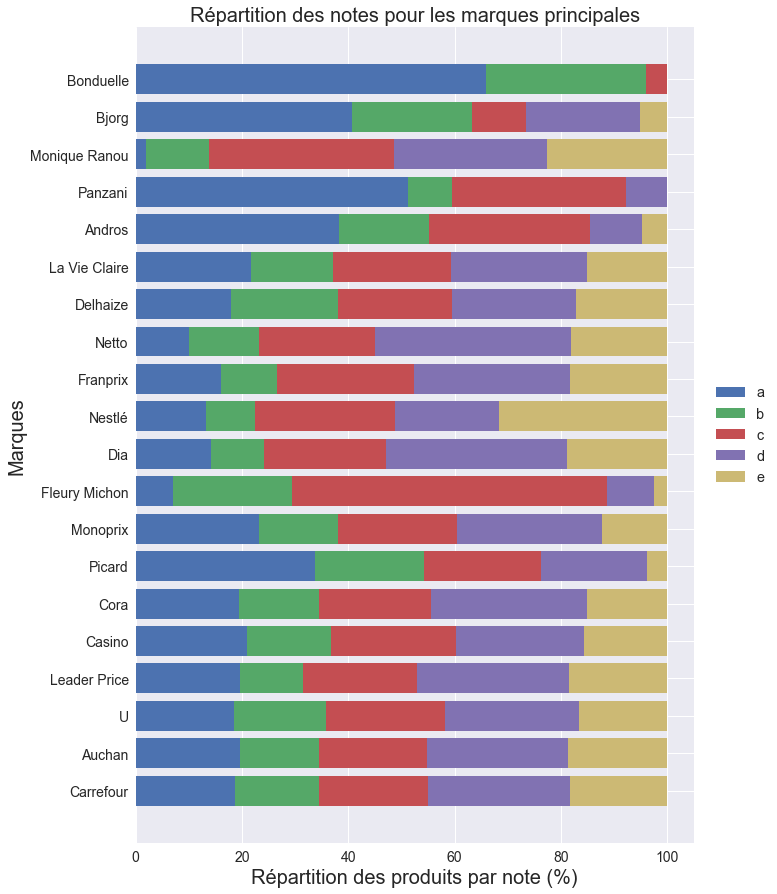

In [53]:
fig, ax = plt.subplots(figsize=(10, 15))
ax.set_title("Répartition des notes pour les marques principales", size=20)

df2 = df[df.brands.isin(df['brands'].value_counts().index)]
brands = pd.DataFrame(df2['brands'].value_counts())

for grade in ['a', 'b', 'c', 'd', 'e']:
    brands[grade] = df2[df2['nutrition_grade_fr'] == grade]['brands'].value_counts() / brands['brands'] * 100
    brands[f"cum_{grade}"] = df2[df2['nutrition_grade_fr'] <= grade]['brands'].value_counts() / brands['brands'] * 100

brands.sort_values('brands', inplace=True, ascending=False)
df_temp2 = brands[:20]

for grade in ['a', 'b', 'c', 'd', 'e']:
    ax.barh(y=df_temp2.index, width=df_temp2[grade], left=(df_temp2[f"cum_{grade}"]-df_temp2[grade]), label=grade)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.set(ylabel='Marques', xlabel='Répartition des produits par note (%)')
    ax.tick_params(labelsize=14)
    
    ax.legend(loc='right', bbox_to_anchor=(1.15, 0.5), fontsize='x-large')

plt.show()

Remarque : 
 - le top 5 des marques les plus sain en terme de nutriscore sont: 
      * Bonduelle | Bjorg |Panzani |Andros | Picards
      * A l'inverse les produits "Nestle" sont globalement mal noté ! 

#### 6) ANALYSE PCA - Réduction dimensionnelle 

Pour cette réduction du nombre de dimensions, nous allons réaliser une Analyse en Composantes Principale (PCA), l'une des méthodes d'analyse de données multivariées les plus utilisées. Elle permet d'explorer des jeux de données multidimensionnels constitués de variables quantitatives.

- Pour cela, nous utiliserons la méthode PCA du module decomposition Sklearn sur les variables numériques centrées et réduite.
- Nous prendrons en variable illustrative de cette ACP le grade Nutriscore du produit.

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


NameError: name 'X' is not defined

In [ ]:
from sklearn.decomposition import PCA

#Centrage et réduction
X = datas_nutri.select_dtypes(include=['float64','int64'])
X_scaled = scaler.fit_transform(X)

#Instanciation de l'ACP
pca = PCA(svd_solver='full').fit(X_scaled)
X_projected = pca.transform(X_scaled)

##### 6.1) Eboulis des valeurs propres
Afin d'avoir un aperçu du nombre de composantes nécessaire à l'analyse, nous allons projeter l'éboulis des valeurs propres

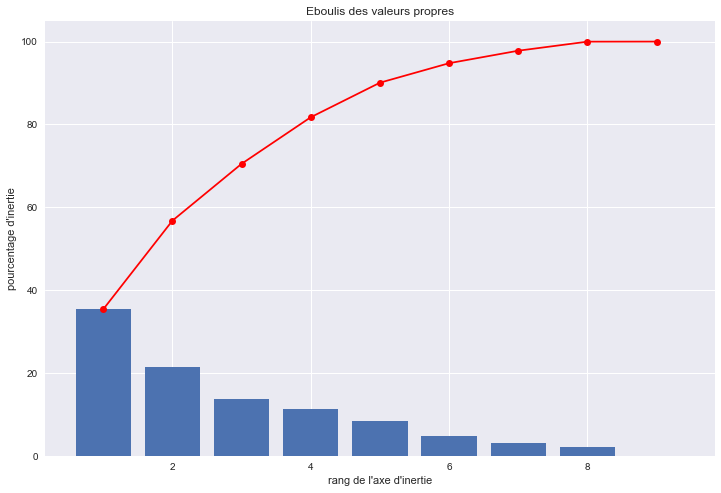

In [ ]:
#Variances expliquées
varexpl = pca.explained_variance_ratio_*100

#Projection de l'éboulis des valeurs propres
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)
plt.plot(np.arange(len(varexpl))+1, varexpl.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [ ]:
print("Le premier plan factoriel couvrira une inertie de {:.2f}% et le second plan : {:.2f}%.".format(varexpl[0:2].sum(),
                                                                                                     varexpl[0:4].sum()))

Le premier plan factoriel couvrira une inertie de 56.76% et le second plan : 81.73%.


Les 2 premiers plans factoriels couvrent une inertie d'un peu plus de 82%. Une analyse sur  <stong> F1 et F2 </strong> semble donc cohérente.

Projetons à présent le cercle des corrélations :

##### 6.2) Cercle des corrélations

In [ ]:
#Espace des composantes principales
pcs = pca.components_

#Matrice des corrélations variables x facteurs
p = X.shape[1]
sqrt_valprop = np.sqrt(pca.explained_variance_)
corvar = np.zeros((p, p))
for dim in range(p):
    corvar[:,dim] = pcs[dim,:] * sqrt_valprop[dim]

#on affiche pour les deux premiers plans factoriels 
corr_matrix = pd.DataFrame({'feature':X.columns,'CORR_F1':corvar[:,0],'CORR_F2':corvar[:,1], 
              'CORR_F3':corvar[:,2], 'CORR_F4':corvar[:,3]})
corr_matrix

feature   CORR_F1   CORR_F2   CORR_F3   CORR_F4
0              energy_100g  0.928237 -0.064213  0.223983 -0.024928
1                 fat_100g  0.806396  0.438205  0.013600 -0.166747
2       saturated-fat_100g  0.767118  0.386387 -0.133011 -0.160418
3       carbohydrates_100g  0.407066 -0.807955  0.177999  0.133853
4              sugars_100g  0.434546 -0.753253 -0.252345  0.115084
5               fiber_100g  0.122581 -0.270091  0.829333 -0.031136
6            proteins_100g  0.156003  0.474026  0.531603  0.176619
7                salt_100g  0.007525  0.248743 -0.022066  0.929562
8  nutrition-score-fr_100g  0.829404  0.028133 -0.318384  0.175349

In [ ]:
#Variable Illustrative
ivNutrigrade = datas_nutri['nutrition-score-fr_100g'].values

#Encodage des grades
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
ivNutrigrade = encoder.fit_transform(ivNutrigrade)
ivNutrigrade = ivNutrigrade.reshape((ivNutrigrade.shape[0],1))

#Corrélation de la variable illustrative avec les axes factoriels 
corrIv = np.zeros((ivNutrigrade.shape[1],p))
for j in range(p): 
    for k in range(ivNutrigrade.shape[1]): 
        corrIv[k,j] = np.corrcoef(ivNutrigrade[:,k],X_projected[:,j])[0,1]

In [ ]:
def cerle_corr(pcs, n_comp, pca, axis_ranks, 
               labels=None, label_rotation=0, 
               illustrative_var_label=None, illustrative_var_corr=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:
            
            # initialisation de la figure
            fig=plt.figure(figsize=(10,10))
            fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=fig.add_subplot(111)
            ax.set_aspect('equal', adjustable='box') 

            #détermination des limites du graphique
            ax.set_xlim(-1,1) 
            ax.set_ylim(-1,1) 

            #affichage des flèches 
            plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                       pcs[d1,:],pcs[d2,:], 
                       angles='xy', scale_units='xy', scale=1, 
                       color="grey", alpha=0.5)
            # et noms de variables
            for i,(x,y) in enumerate(pcs[[d1,d2]].T):
                plt.annotate(labels[i],(x,y),
                             ha='center', va='center',
                             fontsize='14',color="#17aafa", alpha=0.8) 

            #variable illustrative
            if illustrative_var_label is not None :
                plt.annotate(illustrative_var_label,
                             (illustrative_var_corr[0,d1],illustrative_var_corr[0,d2]),
                             color='g')
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                                   illustrative_var_corr[0,d1],illustrative_var_corr[0,d2], 
                                   angles='xy', scale_units='xy', scale=1, color="g", alpha=0.5)

            #ajouter les axes 
            plt.plot([-1,1],[0,0],linewidth=1, color='grey', ls='--') 
            plt.plot([0,0],[-1,1],linewidth=1, color='grey', ls='--')

            #ajouter un cercle 
            cercle = plt.Circle((0,0),1,color='#17aafa',fill=False) 
            ax.add_artist(cercle) 

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

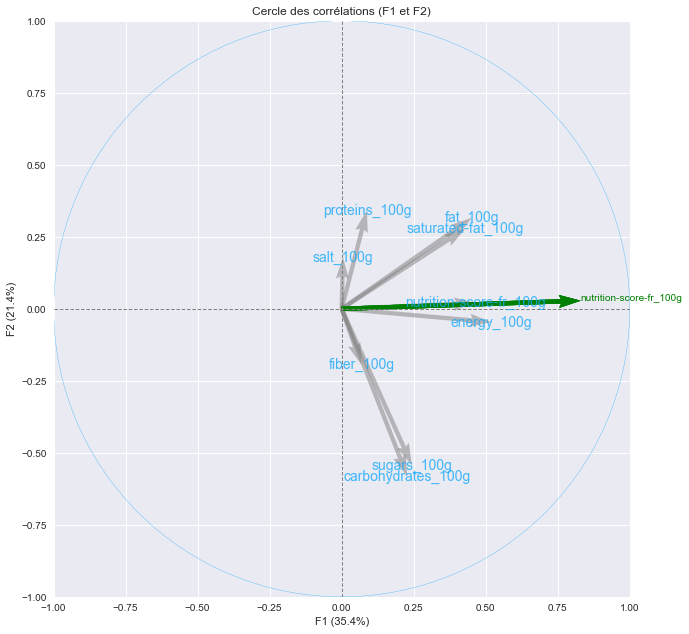

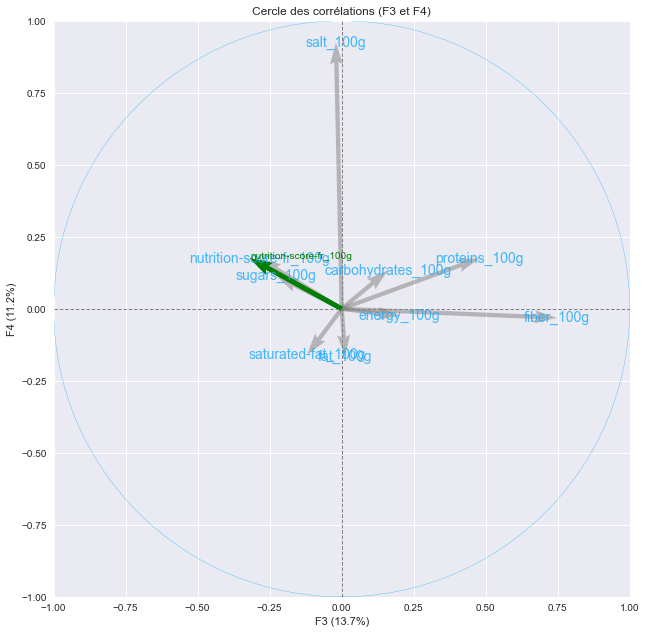

In [ ]:
cerle_corr(pcs, 4, pca, [(0,1),(2,3)], labels = np.array(X.columns), 
           illustrative_var_label="nutrition-score-fr_100g", illustrative_var_corr = corrIv)

Remarque : 

- Cercle de corrélation F1 et F2 :

   * Energie et Nutrition-score sont corrélé positivement à F1 (logique dans le sens que les deux sembles co-dépendants).

   * Proteins et Salt sont corrélé positivement à F2 et inversement Lipide,fibre et le sucre : ce que l'on peut déduire, c'est la répartition des produits sur cet axe : exemple du sel et des proteines ce sont des macros-nutriments qu'on retrouve énormément sur certains produits notamment les différentes viandes ou chacuterie .Et de même pour les produits composée de fibre ,de sucre ou encore de lipides : exemples des fruits .  


- Cercle de corrélation F3 et F4: 

   * Le sel est fortement corrélé  à F4 (et inversement & faiblement corrélée les produits gras ou gras saturée).

   * Proteins et Fibres sont corrélé positivement à F3 et inversement Sucres,le gras et le gras-saturée : Ce que l'on peut déduire, c'est la répartition des produits(plus ou moins saine) sur cet axe : exemple -> globalement les produits composé de fibre et proteins (un peu lipide) // à l'inverse les produits plus mauvais pour la santé comme les produits gras ou gras-saturée comme sucres (bonbons ,etc.. ). 




   N.B: Une flèche qui est petite sur le premier plan factoriel, cela signifie qu’elle est faiblement corrélée à la première composante principale F1, et faiblement corrélée aussi à F2. Mais elle peut très bien l’être à F3, F4, F5, etc.
   Ainsi, il est préférable de n’interpréter que les flèches les plus longues, car les flèches les plus petites correspondent à des variables dites « mal représenté » sur le premier plan factoriel.



##### 6.3) Projection des produits sur les plans factoriels
On peut à présent visualiser la projection des individus sur ces premiers plans factoriels et donc en 2D :

In [ ]:
def plot_plans_factoriels(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(12,8))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=None)
                plt.legend()

             # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center')
            
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des {} individus sur F{} et F{}".format(X_projected.shape[0], d1+1, d2+1))
            plt.show(block=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


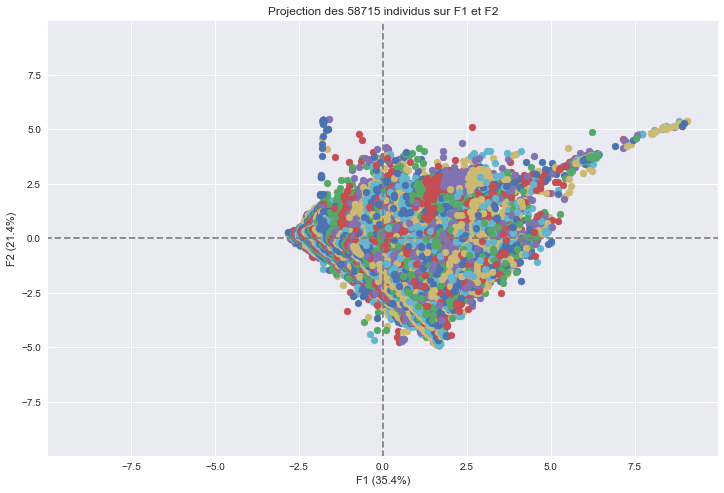

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


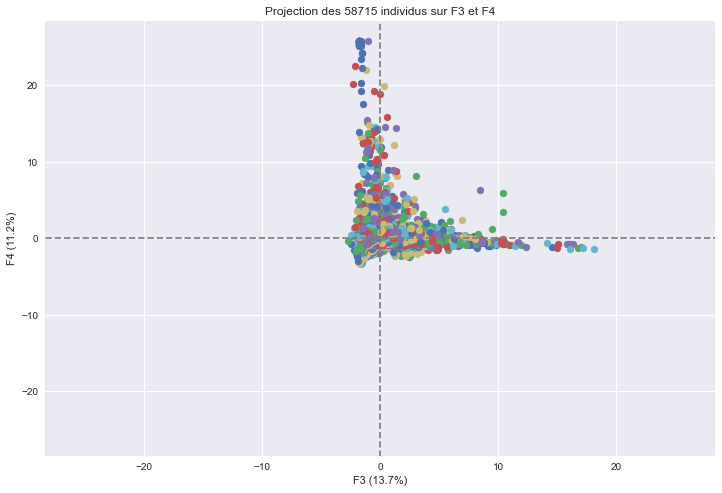

In [ ]:
plot_plans_factoriels(X_projected, 4, pca, [(0,1),(2,3)], illustrative_var = ivNutrigrade)

##### 6.4) Qualité de représentation de la réduction de dimension
Afin d'analyser la performance de notre réduction de dimension via PCA, nous allons regarder le COS² et la CTR*.

On peut calculer la qualité de représentation des variables (COS²) en élevant la corrélation au carré :

<strong>Note :</strong> 
Méthode statistique permettant d’explorer des données dites multivariées (données avec plusieurs variables).

Chaque variable pourrait être considérée comme une dimension différente. L’ACP synthétise cette information en seulement quelques nouvelles variables appelées composantes principales. L’information contenue dans un jeu de données correspond à la variance ou l’inertie totale qu’il contient.

L’objectif de l’ACP est d’identifier les directions (i.e., axes principaux ou composantes principales) le long desquelles la variation des données est maximale.

En résumé, l’analyse en composantes principales (PCA = ACP ) permet:

d’identifier des “profils cachés” dans un jeu de données,
de réduire les dimensions des données en enlevant la redondance des données,
d’identifier les variables corrélées

Dans le cadre de l’étude de l’expression différentielle avec une ACP, plusieurs termes sont utilisés :

- Individus = Échantillons
- Variables = Gènes
- Dimensions = Composantes Principales ( ~ Axe )
- Valeurs propres = Variances des composantes principales
- Coordonnées = Coordonnées des variables pour créer un nuage de points.
- <strong>Cos² = Cosinus carré des variables. Représente la qualité de représentation des variables sur le graphique de l’ACP.</strong>
- Contribution = « Poids » apporté par la variable ou l’individu en pourcentage

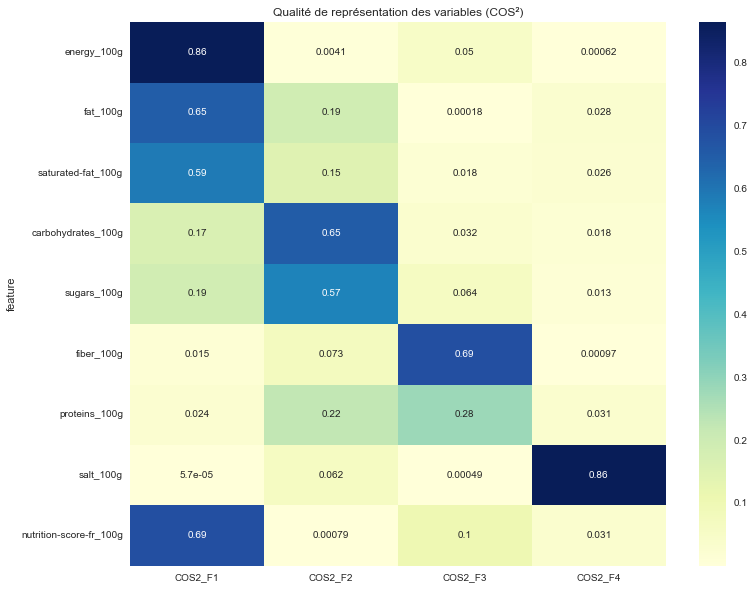

In [ ]:
#Calcul des COS²
cos2var = corvar**2
df_cos2var = pd.DataFrame({'feature':X.columns,'COS2_F1':cos2var[:,0],
                           'COS2_F2':cos2var[:,1], 'COS2_F3':cos2var[:,2],
                           'COS2_F4':cos2var[:,3]}).set_index('feature')

#affichage dans un heatmap seaborn
fig = plt.figure(figsize=(12,10))
sns.heatmap(df_cos2var, annot=True, cmap="YlGnBu")
plt.title("Qualité de représentation des variables (COS²)")
plt.show()

Remarque:
 
 - ici clairement, avec le cercle et le COS², les corrélations importantes entre l'énergie et le caractère "gras" des produits. L'axe  F1 va donc parfaitement représenter le facteur "énergétique" et l'axe F2 quant à lui représentera bien les qualités "sucré / salé"(répartition des produits).

 - => Regardons à présent la contribution des variables aux axes (CTR), elle aussi également basée sur le carré de la corrélation, mais relativisée par l’importance de l’axe :

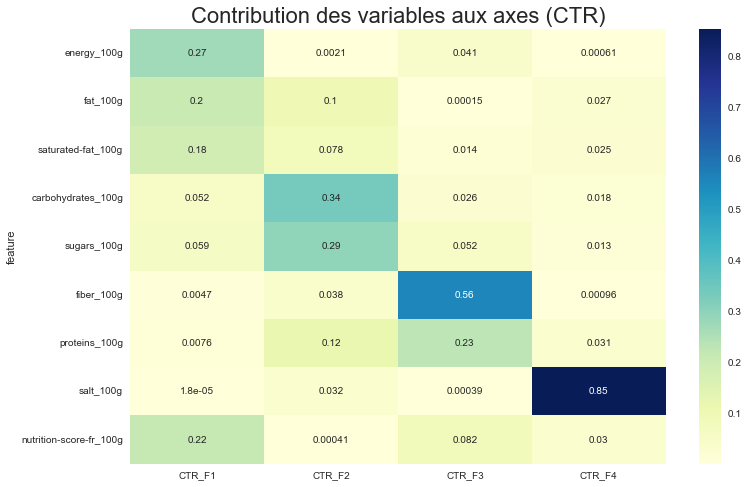

In [ ]:
#contributions 
ctrvar = cos2var 
for k in range(p): 
    ctrvar[:,k] = ctrvar[:,k]/pca.explained_variance_[k] 

df_ctrvar = pd.DataFrame({'feature':X.columns,'CTR_F1':ctrvar[:,0],'CTR_F2':ctrvar[:,1],
                         'CTR_F3':ctrvar[:,2], 'CTR_F4':ctrvar[:,3]}).set_index('feature')

#affichage dans un heatmap seaborn
fig = plt.figure(figsize=(12,8))
sns.heatmap(df_ctrvar, annot=True, cmap="YlGnBu")
plt.title("Contribution des variables aux axes (CTR)", fontsize=22)
plt.show()

#### CONCLUSION : Analyse Univariées et Bivariées : 

 - L'ensemble de nos analyses(Anova,ACP,...) nous montre qu'ils existent  diverses corrélations entre nos différentes "variables" : Nutriscore, macronutriment, apport energétique ...  .  

<Strong>==></strong>  Forte corrélation entre les produits fortement calorique tels que  : <strong>les produits (gras : saturé ou non ) et leurs nutriscores</strong>. 

<Strong>==></strong> Nutriscores ( allant de A à E [-15 à 40] // Plus sain -> mauvais) : or selon nous analyses les produits plus caloriques <strong>(gras,sucre et lipide)</strong> sont aussi ceux qui ont le plus de mauvaises notes . A l'inverse des produits peu calorique riche <strong>en protéine et fibre</strong>. 
   
<Strong>==></strong> De même, <strong>"le nutriscore" et "l'energie"</strong> sont aussi corrélé comme le démontre (l'ACP réalisé). 


  <Strong>==></strong> Forte corrélation entre <strong> Lipide et Graisse</strong> : 
   
   - En effet, certaines graisses saturées sont des lipides. 
   - L'inverse n'est pas vrai, nous pouvons avoir des produits avec beaucoup de lipides et peu de graisse saturée.

   <Strong>==></strong> Forte corrélation entre <strong> sucre et glucide</strong> :

   - De même, pour les lipides et graisses saturées : les sucres et les glucides ont un forte corrélation. 
   - Les sucres font partie des Glucides, mais l'inverse n'est pas vrai; exemple du Fructose .

<Strong>==></strong> Distribution des notes ,marques et enseignes : 

   -Les notes sont globalement homogènes (même si une petite différence est à noter) dans l'ensemble : <span style="color:green"> A+B = 35% </span> <  <span style="color:red">D+E = 47,5%. </span> 

   - Les grandes enseignes (Carefour ,U,... )sont sur-représenter à travers leur propre label même si nous retrouvons de enseigne de taille plus modeste. 

   - Les marques qui semblent avoir le plus de produit avec des nutriscores bonnes et mauvaise sont: 
         <strong>
      * Bonduelle | Bjorg |Panzani |Andros | Picards
      * A l'inverse les produits "Nestle" sont globalement mal noté ! </strong>